# Project: Improving Relational Language Understanding in Intelligent Virtual Agents (IVAs)

## INTRODUCTION

Customer service interactions play a pivotal role in user experience. This project aims to enhance the understanding of relational strategies in customer service by analyzing the RSiCS dataset. Additionally, a rule-based chatbot will be integrated to facilitate enhanced user interaction.

## BUSINESS UNDERSTANDING

In today's digital landscape, customer service interactions are increasingly handled by Intelligent Virtual Agents (IVAs), automated systems designed to assist customers with their inquiries. However, many IVAs struggle to effectively understand and respond to the relational aspects of these interactions, such as greetings, backstory, and emotions. Developing a deeper understanding of relational language is crucial for IVAs to provide personalized and empathetic customer experiences, which are essential for fostering positive customer relationships and enhancing satisfaction. Despite the growing reliance on IVAs in customer service, there remains a lack of comprehensive datasets and methodologies for training and evaluating IVAs on relational language comprehension and response generation, posing a significant challenge in improving the quality of customer service in the digital age.

### PROBLEM STATEMENT

Existing Intelligent Virtual Agents (IVAs) often fail to interpret and respond appropriately to relational language cues in customer interactions, leading to suboptimal customer experiences and decreased satisfaction levels. This limitation impedes IVAs' ability to build rapport with customers, address their needs effectively, and cultivate positive relationships. Consequently, there is a pressing need to develop methodologies and tools that enable IVAs to accurately comprehend and respond to relational language cues, thereby improving the quality of customer service interactions and enhancing overall customer satisfaction.

### OBJECTIVE

The objective of this project is to bridge the gap in Intelligent Virtual Agents' (IVAs) ability to understand and respond to relational language cues in customer interactions. By leveraging a comprehensive dataset sourced from three live customer service IVAs operating in the domains of travel and telecommunications, annotated with relational language cues, the aim is to develop and evaluate methodologies for training and enhancing IVAs' relational language comprehension and response generation capabilities. Ultimately, the goal is to empower IVAs to provide more personalized, empathetic, and effective customer service experiences, thereby improving customer satisfaction and loyalty.

### SOURCE OF DATA

### RSiCS Dataset Overview

#### 1. Source of Data
The RSiCS dataset was collected from commercial customer service IVAs and the TripAdvisor airline forum ([source](https://nextit-public.s3-us-west-2.amazonaws.com/rsics.html)).

#### 2. Data Contents and Formatting:

1. **x_y_align.csv**
  - captures alignment and agreement metrics between Annotator A (x) and Annotator B in a group for specific requests.

2. **all_data_by_threshold.csv**:
   - Merges selections and determines user intentions.

3. **tagged_selections_by_sentence.csv**:
   - Identifies relational language in user requests.

4. **all_multi_intent.csv**:
   - Flags requests with multiple intentions for intent detection strategies.

#### 3. Feature Information (Columns):

**x_y_align.csv:**

- **Annotator A ID:** x
- **Annotator B ID:** Annotator that the alignment score with x is calculated against.
- **Group ID:** The group of 4 annotators that the compared users belong to.
- **Dataset ID:** Dataset y that the request originated from.
- **Request ID:** Unique ID of a request to allow joining between different files.
- **Text:** The original request text.
- **Annotator A Text:** The request text with selections from annotator A contained within [ and ].
- **Annotator B Text:** The request text with selections from annotator B contained within [ and ].
- **Length:** The character length (n) of the original request text in column 6.
- **Error:** The number of character positions (e) where the binary determination of A and B do not agree.
- **Alignment Score:** The alignment as calculated by align = (n - e) / n.
- **Agreement:** Whether or not A and B agree that any selection is necessary.


##### all_data_by_threshold.csv
- **Dataset ID**: Origin dataset identifier.
- **Group ID**: Annotator group identifier.
- **Request ID**: Unique request identifier.
- **MultiIntent**: Flag for multiple user intentions.
- **Threshold**: Selection merging threshold.
- **MergedSelections**: Merged selections by threshold.
- **Unselected**: Unselected text.
- **Selected**: Selected text.
- **Removed**: Length of removed text.

##### tagged_selections_by_sentence.csv
- **Dataset ID**: Origin dataset identifier.
- **Group ID**: Annotator group identifier.
- **Request ID**: Unique request identifier.
- **Threshold**: Selection merging threshold.
- **MergedSelections**: Merged selections by threshold.
- **Unselected**: Unselected text.
- **Selected**: Selected text.
- **Greeting**: Presence of greeting.
- **Backstory**: Presence of self-exposure language.
- **Justification**: Presence of justification language.
- **Rant**: Presence of ranting language.
- **Gratitude**: Presence of gratitude expressions.
- **Other**: Presence of additional information.
- **Express Emotion**: Presence of emotional language.

##### all_multi_intent.csv
- **Dataset ID**: Origin dataset identifier.
- **Group ID**: Annotator group identifier.
- **Request ID**: Unique request identifier.
- **Text**: Original request text.
- **Annotator x**: Binary flag for annotator x's belief in multiple intents.

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

# Data Understanding


### Load and Explore Datasets


In [2]:
#merge all the align.csv files into x_y_align.csv
# Define the list of file names
file_names = ['1_1', '1_2', '1_3', '1_4', '2_1', '2_2', '2_3', '2_4',
              '3_1', '3_2', '3_3', '3_4', '4_1', '4_2', '4_3', '4_4',
              '5_1', '5_2', '5_3', '5_4', '6_1', '6_2', '6_3', '6_4',
              '7_1', '7_2', '7_3', '7_4', '8_1', '8_2', '8_3', '8_4']

# List to store DataFrames
align_dfs = []

# Iterate through each file name and load the corresponding CSV file
for file_name in file_names:
    file_path = f'{file_name}_align.csv'
    df = pd.read_csv(file_path)
    align_dfs.append(df)

# Concatenate all DataFrames into one DataFrame
x_y_align_df = pd.concat(align_dfs, ignore_index=True)

# Save the concatenated DataFrame as x_y_align.csv
x_y_align_df.to_csv('x_y_align.csv', index=False)

# Display information for the concatenated DataFrame
print("Info for x_y_align DataFrame:")
print(x_y_align_df.head())
print(x_y_align_df.info())


Info for x_y_align DataFrame:
  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       6507.0   
1              1             7.0          2.0         1.0       6508.0   
2              1             7.0          2.0         1.0       6509.0   
3              1             7.0          2.0         1.0       6514.0   
4              1             7.0          2.0         1.0       6518.0   

                                                Text  \
0  What advantage is there in booking directly wi...   
1  Hi, Could someone please confirm if CX 884 - H...   
2  I will be transiting Dubai soon en route to Oz...   
3  Does anyone know where I'd find estimated pric...   
4  It's from BA and finds the cheapest BA flight ...   

                                    Annotator A Text  \
0  What advantage is there in booking directly wi...   
1  [Hi, ]Could someone please confirm if CX 884 -...   
2  [I will be transi

In [3]:
def load_datasets():
    # Replace these file paths with the actual paths to your CSV files
    file_paths = [
        'x_y_align.csv',
        'all_data_by_threshold.csv',
        'tagged_selections_by_sentence.csv',
        'all_multi_intent.csv'
    ]

    # Create a dictionary to store the loaded datasets
    datasets = {file_path.split('.')[0]: pd.read_csv(file_path) for file_path in file_paths}

    return datasets

def explore_datasets(datasets):
    for name, df in datasets.items():
        print(f"\n{name} DataFrame:")
        # Print the first 5 rows
        print("Head of the DataFrame:")
        print(df.head())

        # Print the shape of the DataFrame
        print("\nShape of the DataFrame:", df.shape)

        # Print summary statistics
        print("\nSummary statistics of the DataFrame:")
        print(df.describe())

        # Print information about the DataFrame
        print("\nInformation about the DataFrame:")
        print(df.info())

# Load datasets
loaded_datasets = load_datasets()

# Explore datasets
explore_datasets(loaded_datasets)




x_y_align DataFrame:
Head of the DataFrame:
  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       6507.0   
1              1             7.0          2.0         1.0       6508.0   
2              1             7.0          2.0         1.0       6509.0   
3              1             7.0          2.0         1.0       6514.0   
4              1             7.0          2.0         1.0       6518.0   

                                                Text  \
0  What advantage is there in booking directly wi...   
1  Hi, Could someone please confirm if CX 884 - H...   
2  I will be transiting Dubai soon en route to Oz...   
3  Does anyone know where I'd find estimated pric...   
4  It's from BA and finds the cheapest BA flight ...   

                                    Annotator A Text  \
0  What advantage is there in booking directly wi...   
1  [Hi, ]Could someone please confirm if CX 884 -...   
2  [I

# Data Cleaning And Preprocessing

####  Data Quality Checks for x_y_align Dataset


In [4]:
def load_datasets():
    # Replace this file path with the actual path to your CSV file
    file_path = 'x_y_align.csv'

    # Read the CSV file directly
    df = pd.read_csv(file_path)

    # Create a dictionary to store the loaded dataset
    datasets = {'x_y_align': df}

    return datasets

def explore_datasets(datasets):
    for name, df in datasets.items():
        print(f"\n{name} DataFrame:")
        # Print the first 5 rows
        print("Head of the DataFrame:")
        print(df.head())

        # Print the shape of the DataFrame
        print("\nShape of the DataFrame:", df.shape)

        # Print summary statistics
        print("\nSummary statistics of the DataFrame:")
        print(df.describe())

        # Print information about the DataFrame
        print("\nInformation about the DataFrame:")
        print(df.info())

# Load datasets
loaded_datasets = load_datasets()

# Explore datasets
explore_datasets(loaded_datasets)



x_y_align DataFrame:
Head of the DataFrame:
  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       6507.0   
1              1             7.0          2.0         1.0       6508.0   
2              1             7.0          2.0         1.0       6509.0   
3              1             7.0          2.0         1.0       6514.0   
4              1             7.0          2.0         1.0       6518.0   

                                                Text  \
0  What advantage is there in booking directly wi...   
1  Hi, Could someone please confirm if CX 884 - H...   
2  I will be transiting Dubai soon en route to Oz...   
3  Does anyone know where I'd find estimated pric...   
4  It's from BA and finds the cheapest BA flight ...   

                                    Annotator A Text  \
0  What advantage is there in booking directly wi...   
1  [Hi, ]Could someone please confirm if CX 884 -...   
2  [I

In [5]:
def load_datasets():
    # Replace this file path with the actual path to your CSV file
    file_path = 'x_y_align.csv'

    # Read the CSV file directly without printing anything
    df = pd.read_csv(file_path)

    return df

def print_missing_values_and_duplicates(df):
    # Print number of missing values
    print("Number of missing values in each column:")
    print(df.isnull().sum())

    # Print number of duplicates
    print("\nNumber of duplicates:", df.duplicated().sum())

# Load the dataset
df = load_datasets()

# Print only the number of missing values and duplicates
print_missing_values_and_duplicates(df)


Number of missing values in each column:
Annotator A ID       32
Annotator B ID       32
Parition ID         160
Corpora ID          160
Sentence ID         160
Text                160
Annotator A Text    160
Annotator B Text    160
Length              160
Error               160
Alignment Score     160
Agreement           160
dtype: int64

Number of duplicates: 55


1. x_y_align Dataset: Missing values detected in multiple columns, 55 duplicate rows, and outliers observed in Annotator B ID, Length, Error, and Alignment Score.



#### Drop Missing Values and Duplicates



In [6]:
def load_datasets():
    # Replace this file path with the actual path to your CSV file
    file_path = 'x_y_align.csv'

    # Read the CSV file directly
    df = pd.read_csv(file_path)

    return df

def clean_dataset(df):
    # Drop missing values
    df_cleaned = df.dropna()

    # Drop duplicates
    df_cleaned = df_cleaned.drop_duplicates()

    return df_cleaned

# Load the dataset
df = load_datasets()

# Clean the dataset
df_cleaned = clean_dataset(df)

# Print the shape of the cleaned dataset
print("Shape of the cleaned dataset:", df_cleaned.shape)



Shape of the cleaned dataset: (81108, 12)


#### Data Quality Checks for All Data by Threshold, Tagged Selections by Sentence, and All Multi-Intent Datasets

In [7]:
def load_datasets():
    try:
        # Load datasets
        all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
        tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')
        all_multi_intent_df = pd.read_csv('all_multi_intent.csv')

        return all_data_by_threshold_df, tagged_selections_df, all_multi_intent_df

    except FileNotFoundError as e:
        print(f"Error: {e}. Please make sure the file paths are correct.")

# Call the function to load datasets
all_data, tagged_selections, all_multi_intent = load_datasets()


In [8]:
def load_datasets():
    try:
        # Load datasets
        all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
        tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')
        all_multi_intent_df = pd.read_csv('all_multi_intent.csv')

        return all_data_by_threshold_df, tagged_selections_df, all_multi_intent_df

    except FileNotFoundError as e:
        print(f"Error: {e}. Please make sure the file paths are correct.")

# Call the function to load datasets
all_data, tagged_selections, all_multi_intent = load_datasets()

# Print the size of each dataset
print("Size of all_data_by_threshold_df:", all_data.shape)
print("Size of tagged_selections_df:", tagged_selections.shape)
print("Size of all_multi_intent_df:", all_multi_intent.shape)


Size of all_data_by_threshold_df: (32000, 9)
Size of tagged_selections_df: (6759, 14)
Size of all_multi_intent_df: (1241, 12)


In [9]:
def load_datasets():
    try:
        # Load datasets
        all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
        tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')
        all_multi_intent_df = pd.read_csv('all_multi_intent.csv')

        return all_data_by_threshold_df, tagged_selections_df, all_multi_intent_df

    except FileNotFoundError as e:
        print(f"Error: {e}. Please make sure the file paths are correct.")

def print_data_info(df, name):
    print(f"\nInfo for {name} dataset:")
    print("Number of missing values:")
    print(df.isnull().sum())

    print("\nNumber of outliers:")
    # You can add your outlier detection logic here

    print("\nNumber of duplicates:")
    print(df.duplicated().sum())

# Call the function to load datasets
all_data, tagged_selections, all_multi_intent = load_datasets()

# Print information for each dataset
print_data_info(all_data, 'all_data_by_threshold')
print_data_info(tagged_selections, 'tagged_selections_by_sentence')
print_data_info(all_multi_intent, 'all_multi_intent')




Info for all_data_by_threshold dataset:
Number of missing values:
Dataset ID              0
Group ID                0
Request ID              0
MultiIntent             0
Threshold               0
MergedSelections        0
Unselected            798
Selected            17087
Removed                 0
dtype: int64

Number of outliers:

Number of duplicates:
0

Info for tagged_selections_by_sentence dataset:
Number of missing values:
Dataset                0
Partition              0
SentenceID             0
Threshold              0
MergedSelections       0
Unselected            34
Selected            2969
Greeting               0
Backstory              0
Justification          0
Rant                   0
Gratitude              0
Other                  0
Express Emotion        0
dtype: int64

Number of outliers:

Number of duplicates:
0

Info for all_multi_intent dataset:
Number of missing values:
Dataset ID     0
Group ID       0
Request ID     0
Text           0
Annotator 1    0
Annotator

#### "Dropping 'Unselected' and 'Selected' Columns"







In [10]:
# Load datasets
all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')

# Function to drop columns with missing values and print the updated columns
def drop_columns(df, columns_to_drop, dataset_name):
    df.drop(columns=columns_to_drop, inplace=True)  # Corrected 'axis' to 'columns'
    print(f"Columns after dropping {', '.join(columns_to_drop)} in {dataset_name} dataset:")
    print(df.columns)

# Drop columns for all_data_by_threshold dataset
drop_columns(all_data_by_threshold_df, ['Unselected', 'Selected'], 'all_data_by_threshold')

# Drop columns for tagged_selections_by_sentence dataset
drop_columns(tagged_selections_df, ['Unselected', 'Selected'], 'tagged_selections_by_sentence')



Columns after dropping Unselected, Selected in all_data_by_threshold dataset:
Index(['Dataset ID', 'Group ID', 'Request ID', 'MultiIntent', 'Threshold',
       'MergedSelections', 'Removed'],
      dtype='object')
Columns after dropping Unselected, Selected in tagged_selections_by_sentence dataset:
Index(['Dataset', 'Partition', 'SentenceID', 'Threshold', 'MergedSelections',
       'Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Other',
       'Express Emotion'],
      dtype='object')


### "Dataset Merge Operation"

#### 'all_data_by_threshold_df' and 'all_multi_intent'






In [11]:
# Define the merged keys
merge_keys = ['Dataset ID', 'Group ID', 'Request ID']

merged_df = pd.merge(all_data, all_multi_intent, on=merge_keys, how='outer')

# Check the shape of the merged DataFrame
print("Shape of merged DataFrame:", merged_df.shape)









Shape of merged DataFrame: (32000, 18)


#### 'merged_df' and  'df_cleaned'

In [12]:
merged_df = pd.merge(merged_df, df_cleaned, on='Text', how='outer', suffixes=('_all_data', '_df_cleaned'))

# Check the shape of the merged DataFrame
print("Shape of merged DataFrame:", merged_df.shape)



Shape of merged DataFrame: (113268, 29)


#### 'merged_df' and 'tagged_selections_df'

In [13]:
# Columns to use for the merge
merge_columns = ['MergedSelections', 'Threshold']

# Merge the datasets using outer join on common columns
merged_outer_df = pd.merge(merged_df, tagged_selections_df,
                           left_on=merge_columns, right_on=merge_columns, how='outer', suffixes=('_merged', '_tagged'))

# Check the shape of the merged DataFrame
print("Shape of merged DataFrame (outer join):", merged_outer_df.shape)

Shape of merged DataFrame (outer join): (117284, 39)


#### Removing Duplicates in the 'Text' Column of Merged DataFrame

In [14]:
# Drop duplicates based on the "Text" column
merged_outer_df.drop_duplicates(subset='Text', inplace=True)

# Print the shape of the dataset after dropping duplicates
print("Shape of the dataset after dropping duplicates:", merged_outer_df.shape)

# Print the first few rows of the dataset to verify
print("First few rows of the dataset after dropping duplicates:")
print(merged_outer_df.head())


Shape of the dataset after dropping duplicates: (7813, 39)
First few rows of the dataset after dropping duplicates:
       Dataset ID  Group ID  Request ID  MultiIntent  Threshold  \
0             1.0       1.0      1483.0          0.0        1.0   
5740          2.0       2.0      7678.0          1.0        4.0   
26200         4.0       2.0      9547.0          1.0        2.0   
28697         4.0       1.0      5836.0          1.0        2.0   
31112         1.0       1.0      1902.0          1.0        1.0   

                                        MergedSelections  \
0      [Today Ellemay wrote: “I however, like Qantas ...   
5740   I have a disability and want a round trip tick...   
26200  we are moving and I need to get the new addres...   
28697  why am i unable to connect with my user name a...   
31112  [Hi all, I posted a couple of days ago asking ...   

                                              Unselected  \
0      I would really like to know the criteria which...   


In [15]:
# Print the shape of the dataset after dropping duplicates
print("Shape of the dataset after dropping duplicates:", merged_outer_df.shape)


Shape of the dataset after dropping duplicates: (7813, 39)


In [16]:
# Print the names of the columns
print("Names of the columns:")
print(merged_outer_df.columns)


Names of the columns:
Index(['Dataset ID', 'Group ID', 'Request ID', 'MultiIntent', 'Threshold',
       'MergedSelections', 'Unselected', 'Selected', 'Removed', 'Text',
       'Annotator 1', 'Annotator 2', 'Annotator 3', 'Annotator 4',
       'Annotator 5', 'Annotator 6', 'Annotator 7', 'Annotator 8',
       'Annotator A ID', 'Annotator B ID', 'Parition ID', 'Corpora ID',
       'Sentence ID', 'Annotator A Text', 'Annotator B Text', 'Length',
       'Error', 'Alignment Score', 'Agreement', 'Dataset', 'Partition',
       'SentenceID', 'Greeting', 'Backstory', 'Justification', 'Rant',
       'Gratitude', 'Other', 'Express Emotion'],
      dtype='object')


# Feature Selection

**Key Columns Overview:**

In the context of the IVA, several key columns play crucial roles in understanding, organizing, and processing user requests. These columns encompass identification, user input, annotated selections, alignment information, agreement indicators, language class annotations, missing value identifiers, and alignment/quality metrics.

**Identification and Context:**
- `Dataset ID`: Helps in understanding the source or domain of the request.
- `Request ID`: Unique identifier for individual requests, aiding in organization and tracking.

**User Input:**
- `Text`: Original user requests serve as input for IVA understanding.

**Annotated Selections:**
- `MergedSelections`: Annotated selections by annotators, marking potentially unnecessary parts in user requests.

**Alignment Information:**
- `Alignment Score`: Indicates the alignment between annotators, providing insights into agreement or disagreement.

**Agreement Indicator:**
- `Agreement`: Binary indicator of whether annotators agree on the necessity of any selection.

**Language Class Annotations:**
- `Greeting`, `Backstory`, `Justification`, `Rant`, `Gratitude`, `Other`, `Express Emotion`: Provide information about the nature of language in the highlighted sections, helping in understanding user sentiment and context.

**Alignment and Quality Metrics:**
- `Length`: Character length of the original request, useful for context and analysis.
- `Error`: Number of character positions where annotators disagree, highlighting potential areas for improvement in training data quality.



In [17]:
# Select the desired columns
selected_columns = ['Dataset ID', 'Request ID', 'Text', 'MergedSelections',
                    'Alignment Score', 'Agreement', 'Greeting', 'Backstory',
                    'Justification', 'Rant', 'Gratitude', 'Other', 'Express Emotion',
                    'Length', 'Error']

# Subset the DataFrame with the selected columns
selected_df = merged_outer_df[selected_columns]

# Display the selected DataFrame
print(selected_df)



        Dataset ID  Request ID  \
0              1.0      1483.0   
5740           2.0      7678.0   
26200          4.0      9547.0   
28697          4.0      5836.0   
31112          1.0      1902.0   
...            ...         ...   
117224         NaN         NaN   
117236         NaN         NaN   
117248         NaN         NaN   
117260         NaN         NaN   
117272         NaN         NaN   

                                                     Text  \
0                                                     NaN   
5740    I have a disability and want a round trip tick...   
26200   we are moving and I need to get the new addres...   
28697   why am i unable to connect with my user name a...   
31112   Hi all, I posted a couple of days ago asking f...   
...                                                   ...   
117224  I received a 20 credit for my bill but can't a...   
117236  I am watching on demand and in the middle of a...   
117248  Why does the balance on this page 

##### DataFrame Copy Creation

In [18]:
selected_df_copy = selected_df


#### NaN Values in 'Text' Column

In [19]:
selected_df_copy.dropna(subset=['Text'], inplace=True)


In [20]:
nan_text_count = selected_df_copy['Text'].isnull().sum()
print("NaN count in the 'Text' column:", nan_text_count)


NaN count in the 'Text' column: 0


#### Special Tokens for Missing Values in 'MergedSelections' Column

In [21]:
selected_df_copy = selected_df[selected_columns].copy()

# Replace empty strings with special tokens in the 'MergedSelections' column
selected_df.loc[selected_df['MergedSelections'].isna(), 'MergedSelections'] = '<UNK>'


#### Missing Values for Dataset Identification Columns

In [22]:
# Create a copy of the DataFrame
selected_df_copy = selected_df.copy()

# Fill NaN values in 'Dataset ID' and 'Request ID' with unique identifiers
max_dataset_id = selected_df_copy['Dataset ID'].max()
max_request_id = selected_df_copy['Request ID'].max()
selected_df_copy['Dataset ID'] = selected_df_copy['Dataset ID'].fillna(max_dataset_id + 1)
selected_df_copy['Request ID'] = selected_df_copy['Request ID'].fillna(max_request_id + 1)

# Check for NaNs in the modified DataFrame
nan_dataset_id = selected_df_copy['Dataset ID'].isna().sum()
nan_request_id = selected_df_copy['Request ID'].isna().sum()

print("Number of NaNs in 'Dataset ID':", nan_dataset_id)
print("Number of NaNs in 'Request ID':", nan_request_id)



Number of NaNs in 'Dataset ID': 0
Number of NaNs in 'Request ID': 0


#### Fill missing values with -1 for binary columns

In [23]:
# List of columns to fill missing values with -1
columns_to_fill = ['Agreement', 'Backstory', 'Other']

# Fill missing values with -1
selected_df_copy[columns_to_fill] = selected_df_copy[columns_to_fill].fillna(-1)




In [24]:
# Columns to fill NaN values with -1
columns_to_fill = ['Greeting', 'Justification', 'Rant', 'Gratitude', 'Express Emotion']

# Fill NaN values with -1 in the selected DataFrame copy
selected_df_copy[columns_to_fill] = selected_df_copy[columns_to_fill].fillna(-1)


#### Median for Numerical Columns

In [25]:
# Calculate the median for each column
alignment_score_median = selected_df_copy['Alignment Score'].median()
length_median = selected_df_copy['Length'].median()
error_median = selected_df_copy['Error'].median()

# Fill NaN values with the respective medians
selected_df_copy['Alignment Score'].fillna(alignment_score_median, inplace=True)
selected_df_copy['Length'].fillna(length_median, inplace=True)
selected_df_copy['Error'].fillna(error_median, inplace=True)



In [26]:
nan_count_total = selected_df_copy.isnull().sum().sum()
if nan_count_total > 0:
    print("There are NaN values in the dataset.")
    print("Total NaN count:", nan_count_total)
else:
    print("There are no NaN values in the dataset.")


There are no NaN values in the dataset.


In [27]:
num_rows, num_columns = selected_df_copy.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 7812
Number of columns: 15


In [28]:
print(selected_df_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7812 entries, 5740 to 117272
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dataset ID        7812 non-null   float64
 1   Request ID        7812 non-null   float64
 2   Text              7812 non-null   object 
 3   MergedSelections  7812 non-null   object 
 4   Alignment Score   7812 non-null   float64
 5   Agreement         7812 non-null   float64
 6   Greeting          7812 non-null   float64
 7   Backstory         7812 non-null   float64
 8   Justification     7812 non-null   float64
 9   Rant              7812 non-null   float64
 10  Gratitude         7812 non-null   float64
 11  Other             7812 non-null   float64
 12  Express Emotion   7812 non-null   float64
 13  Length            7812 non-null   float64
 14  Error             7812 non-null   float64
dtypes: float64(13), object(2)
memory usage: 976.5+ KB
None


# Exploratory Data Analysis

### Word Cloud of Text Data

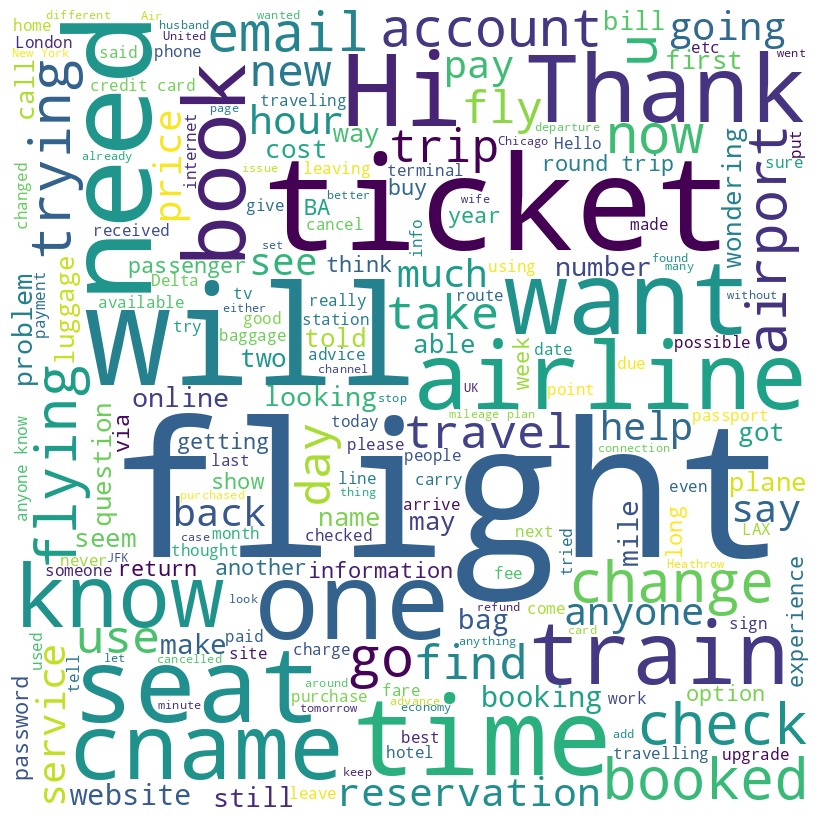

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Remove NaN values from the text data
text_data_cleaned = selected_df_copy['Text'].dropna()

# Combine text data into a single string
text_combined = ' '.join(text_data_cleaned)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=None,
                      min_font_size=10).generate(text_combined)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


The text data is majorly related to travel or airline:

1. The most frequent phrase or combination of words is "hour layover", appearing 243,324 times in the text data.

2. The words "will", "password", and "US Airways" each appear 162,216 times, indicating their significant presence in the text.

3. Other notable words include "know", "download", "app", "sent", "flight", and "messages", each appearing 81,108 times.


### Visualising the numerical columns

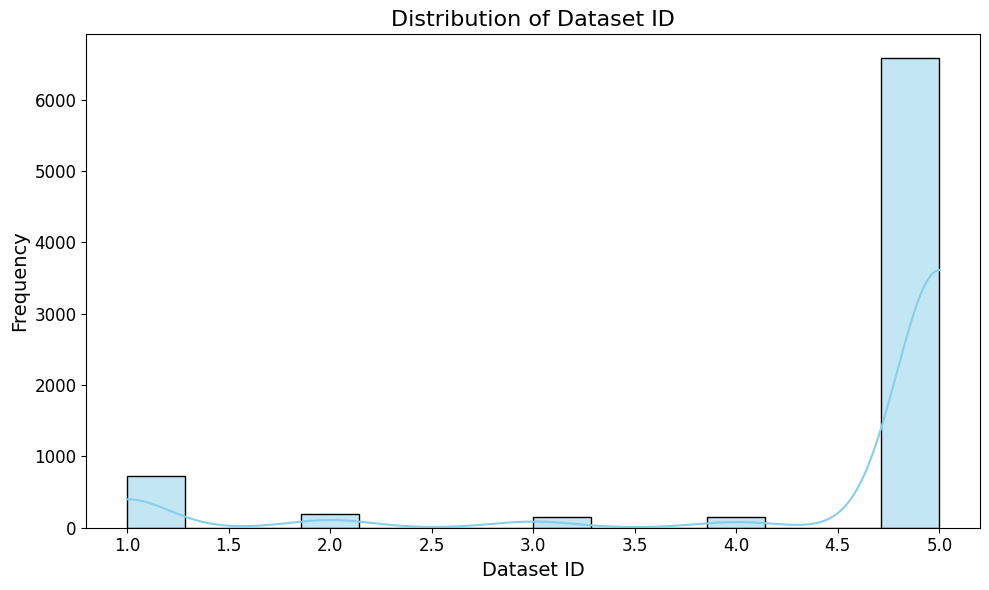

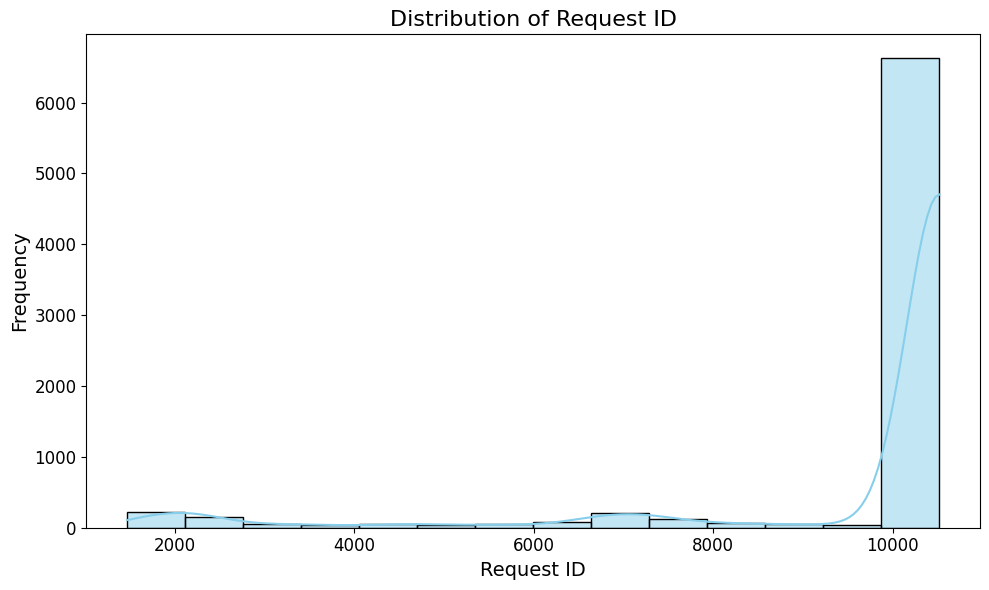

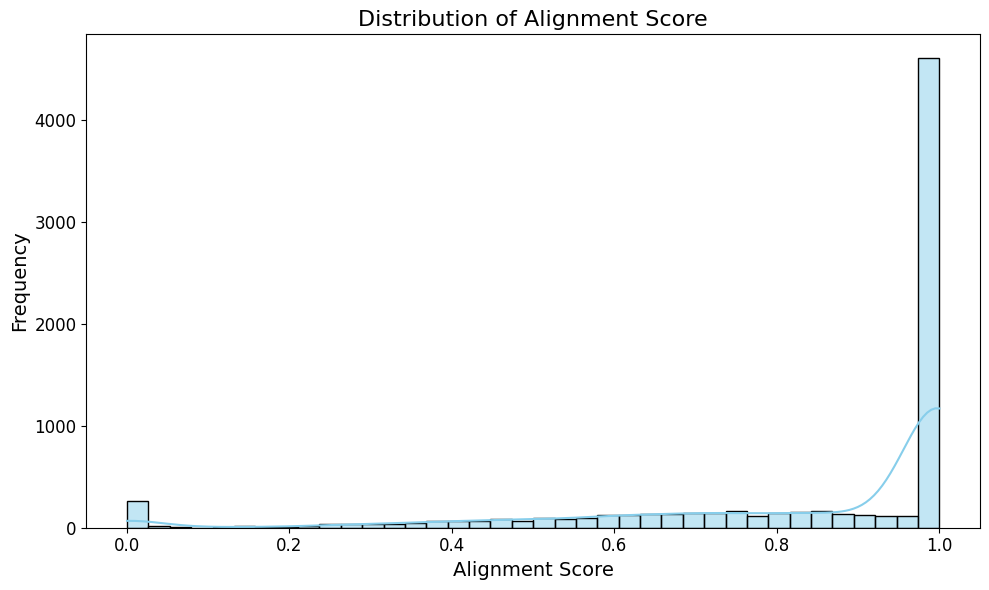

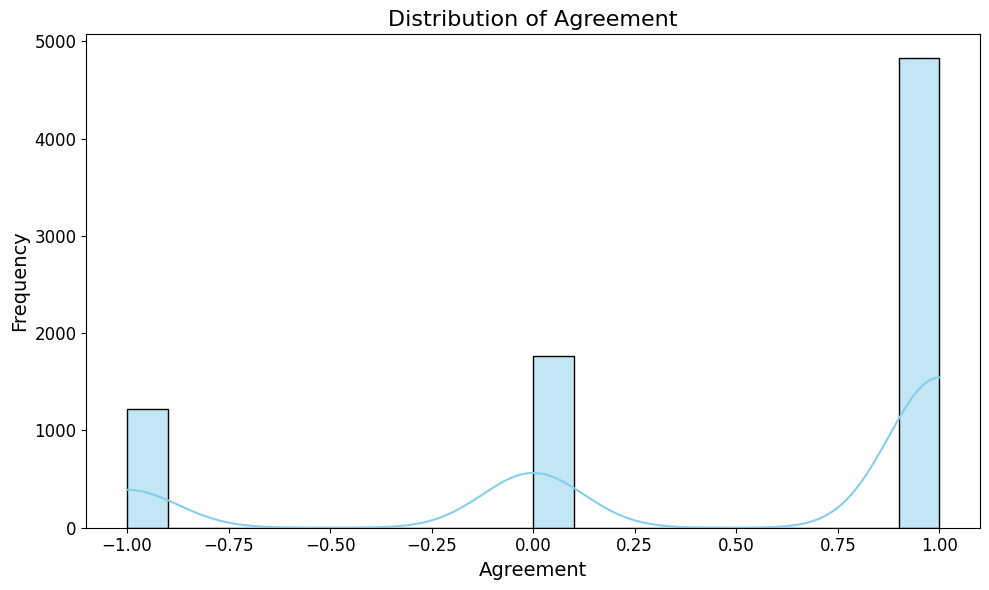

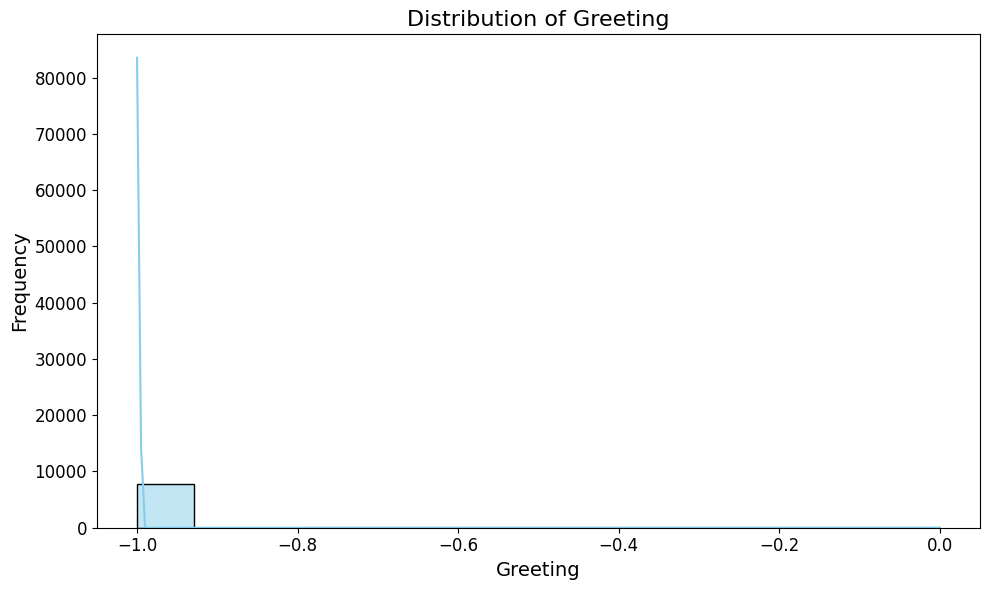

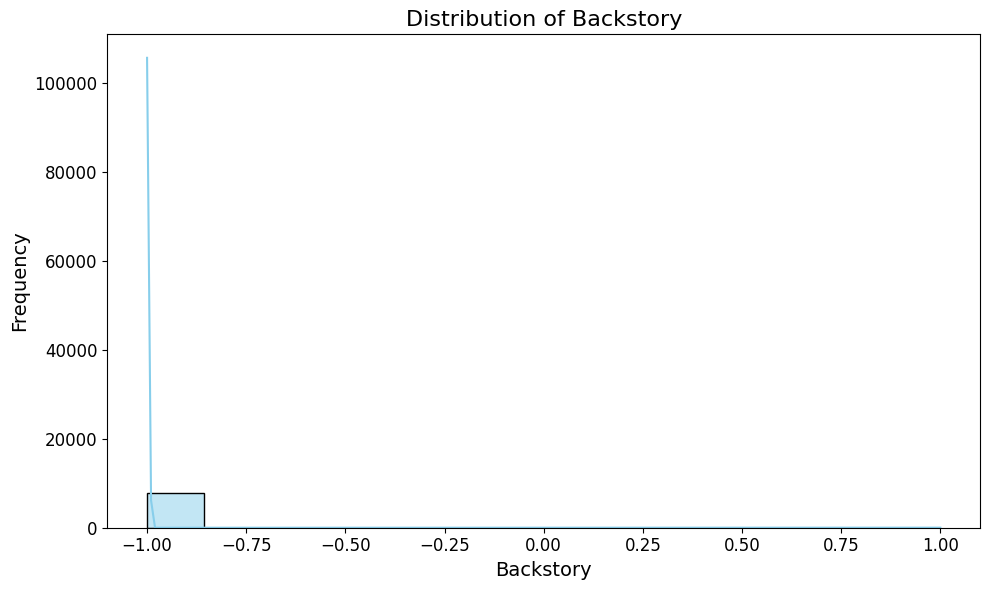

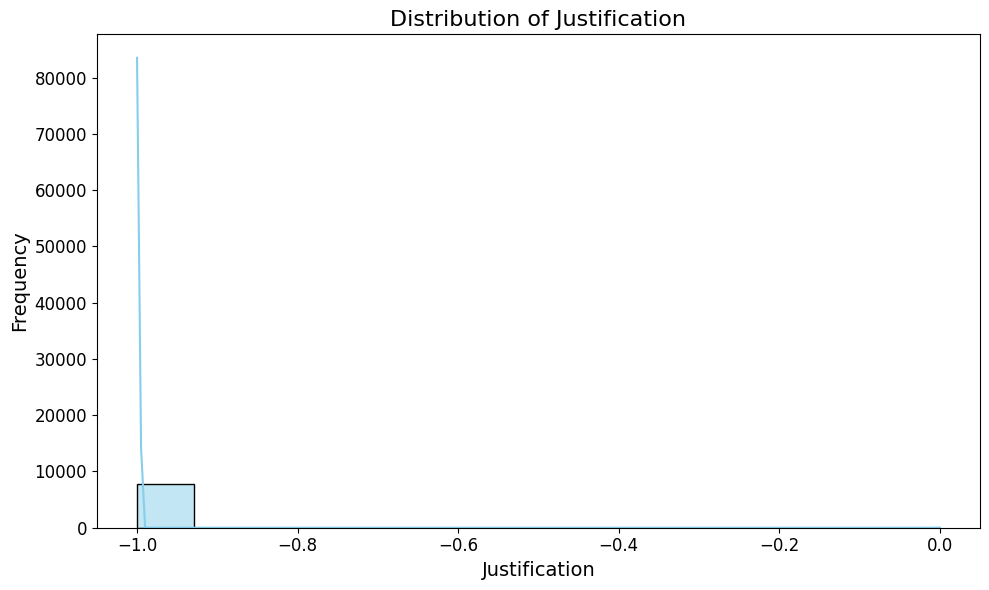

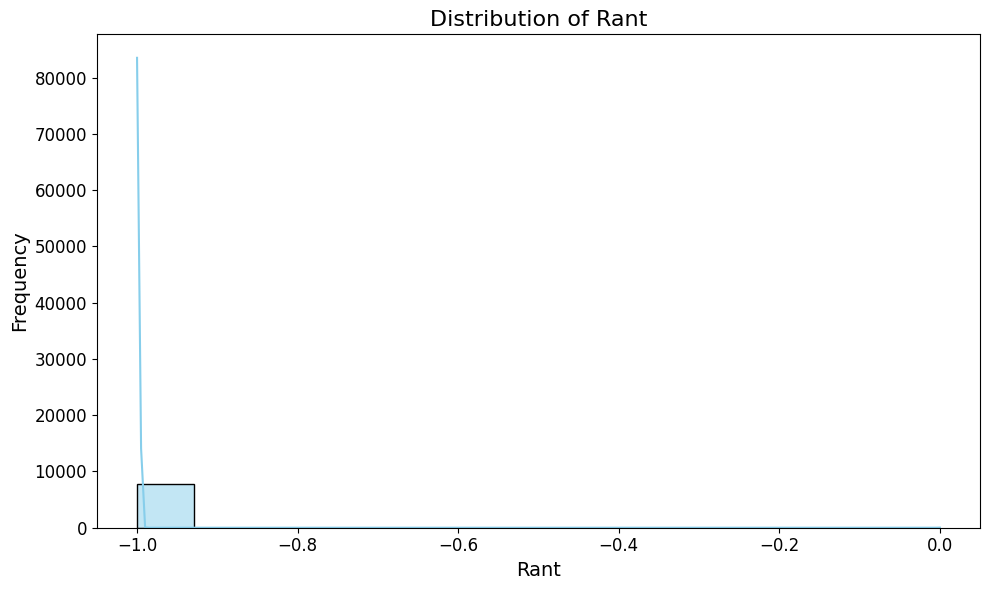

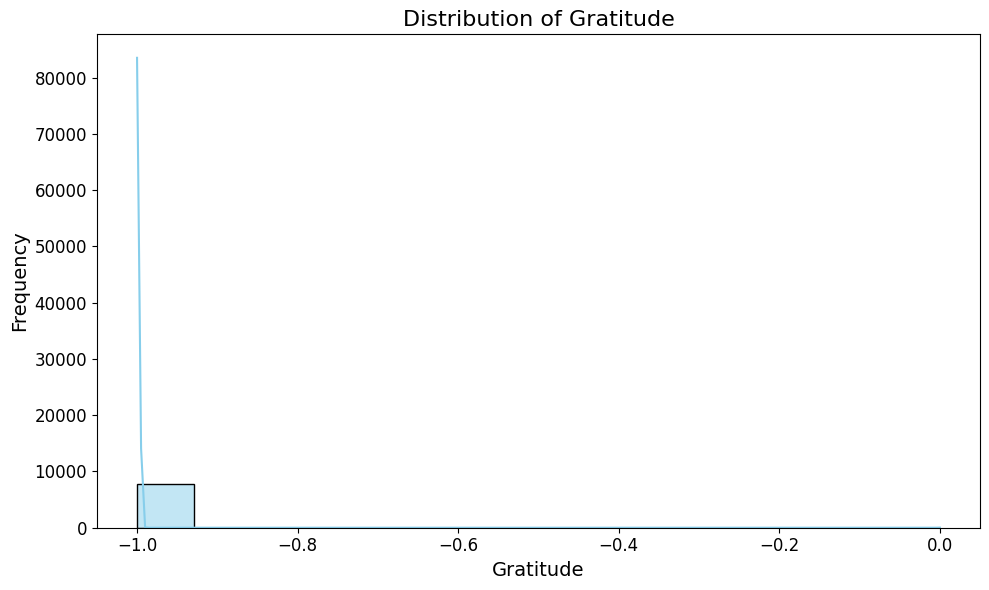

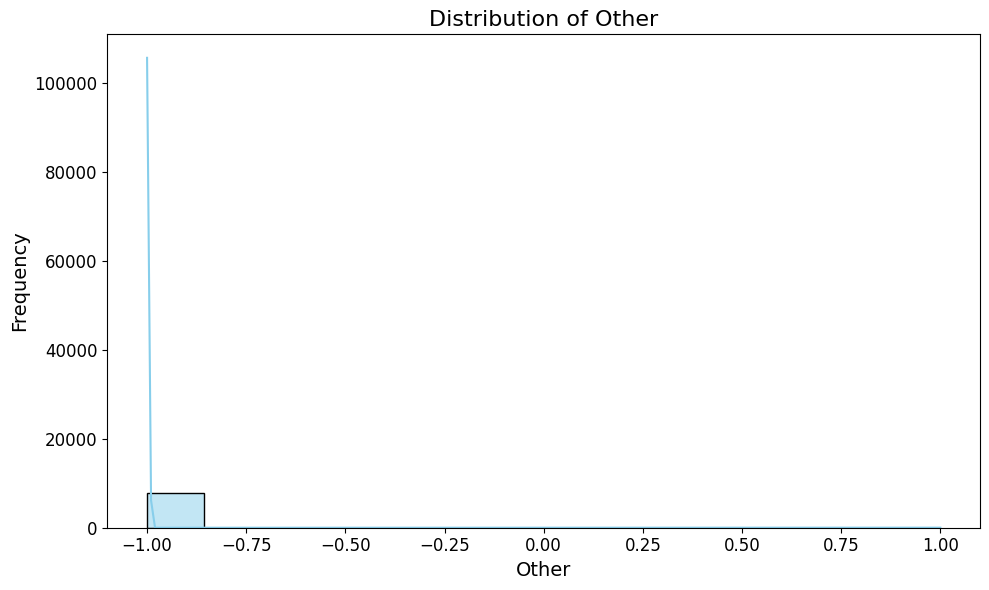

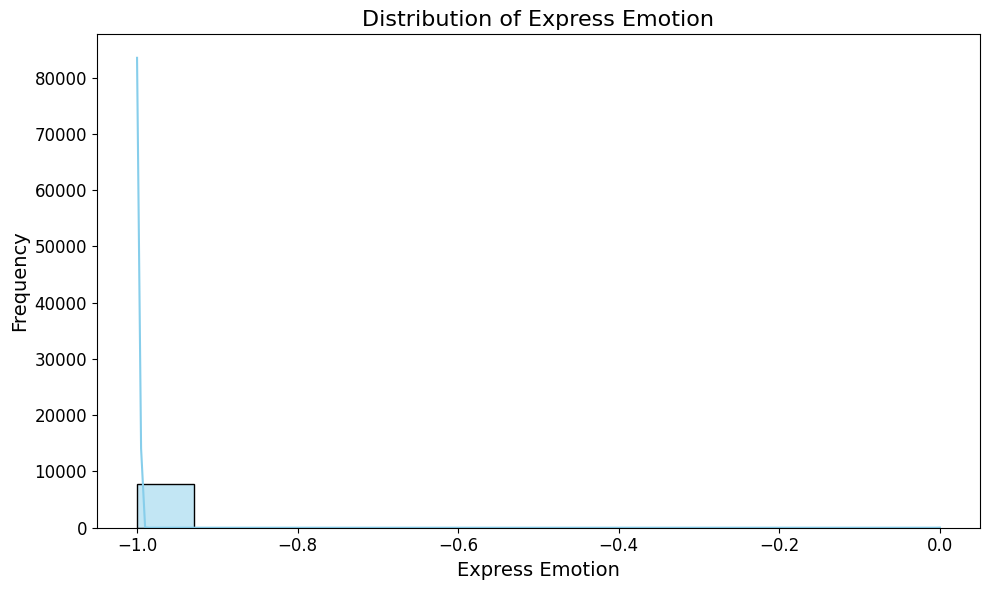

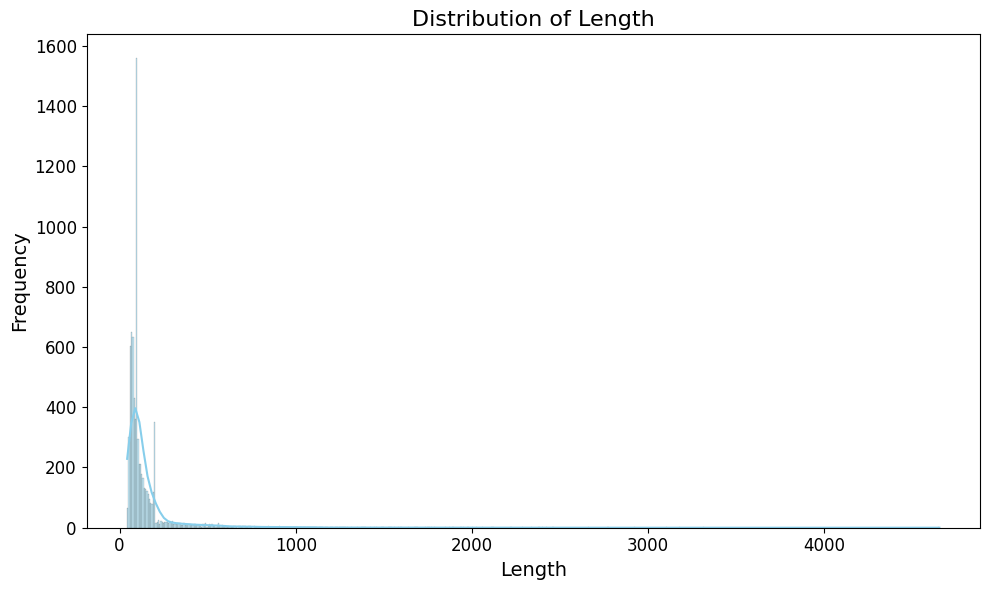

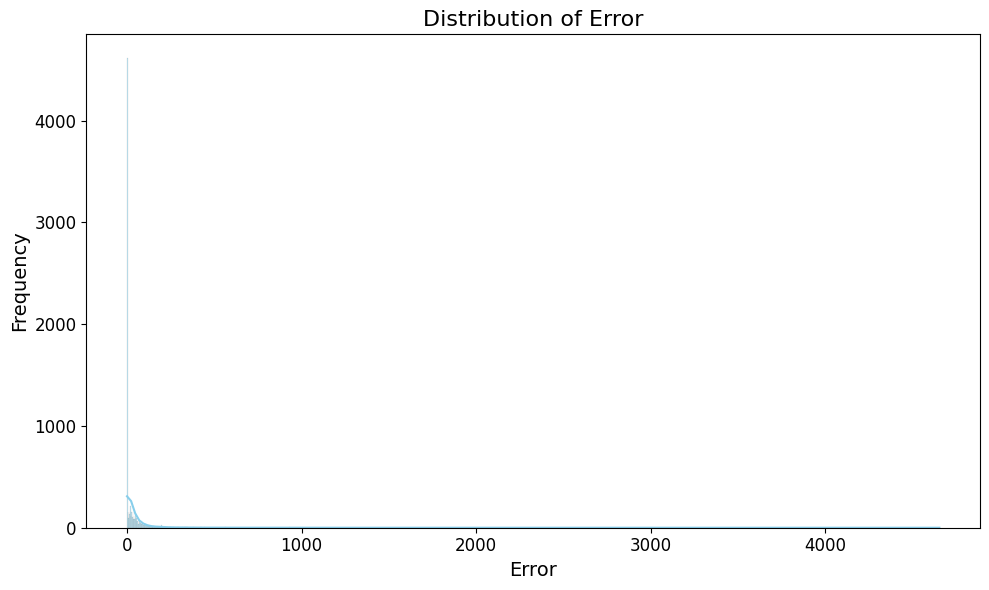

In [30]:
# Get all numerical columns
numerical_columns = selected_df_copy.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=selected_df_copy, x=column, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


1. Dataset ID_y: Majority of the data falls within bins 1 and 38, with significant entries in bin 13 and bin 84.

2. Request ID: Similar to Dataset ID_y, most data points are concentrated in bins 1, 84, and 103.

3. Alignment Score: Entries are spread across various bins, with notable concentrations in bins 1, 16, 25, 30, 32, 34, 41, 42, 45, 52, 55, and 57.

4. Agreement: All data falls within a single bin (bin 1), indicating high agreement across the dataset.

5. Greeting: The majority of greetings fall within bin 1, with a smaller portion in bin 20.

6. Backstory: Predominantly concentrated in bin 1, indicating a low to moderate level of backstory usage across the dataset.



### Visualising Categorical columns

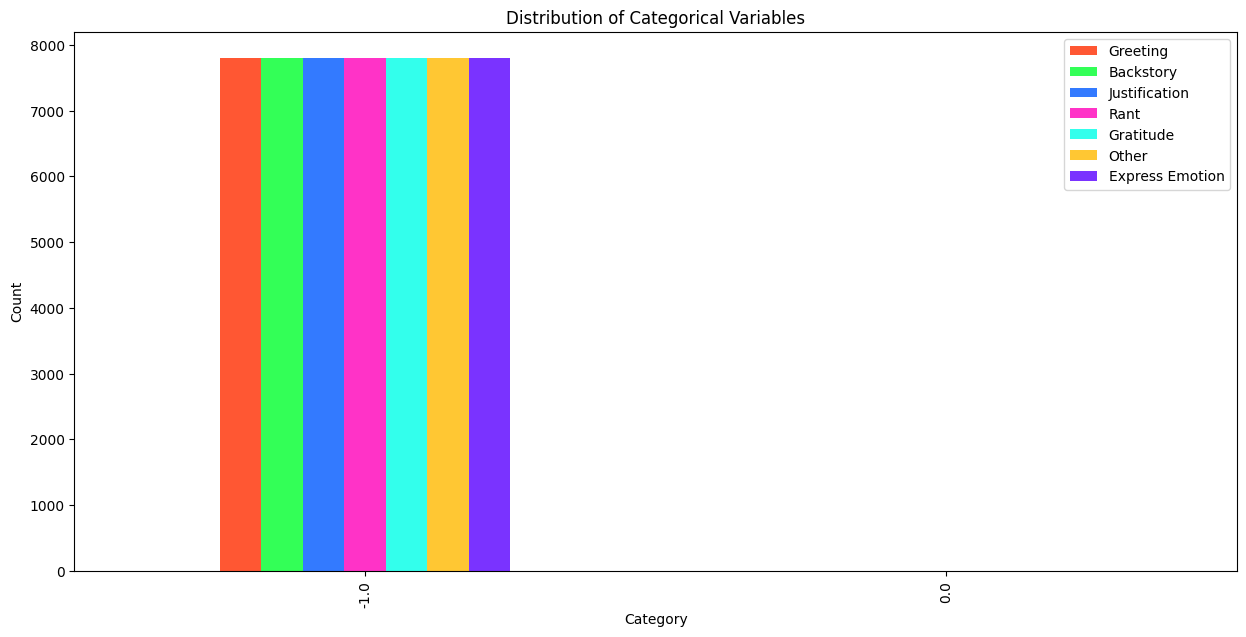

In [31]:
# List of categorical columns
categorical_columns = ['Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Other', 'Express Emotion']

# Create a new DataFrame to store the value counts of each column
value_counts_df = pd.DataFrame()

for column in categorical_columns:
    # Get the value counts of the column
    value_counts = selected_df_copy[column].value_counts()
    value_counts_df[column] = value_counts

# Define custom colors
custom_colors = ['#FF5733', '#33FF57', '#337AFF', '#FF33C7', '#33FFEC', '#FFC733', '#7A33FF']

# Create a bar plot with the custom colors
value_counts_df.plot(kind='bar', figsize=(15, 7), color=custom_colors)

plt.title('Distribution of Categorical Variables')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



Value counts for Greeting:
0: 357,420
1: 48,120

Value counts for Backstory:
0: 280,380
1: 125,160

Value counts for Justification:
0: 401,220
1: 4,320

Value counts for Rant:
0: 387,960
1: 17,580

Value counts for Gratitude:
0: 374,460
1: 31,080

Value counts for Other:
0: 318,900
1: 86,640

Value counts for Express Emotion:
0: 398,340
1: 7,200



### Numerical vs Categorical Columns

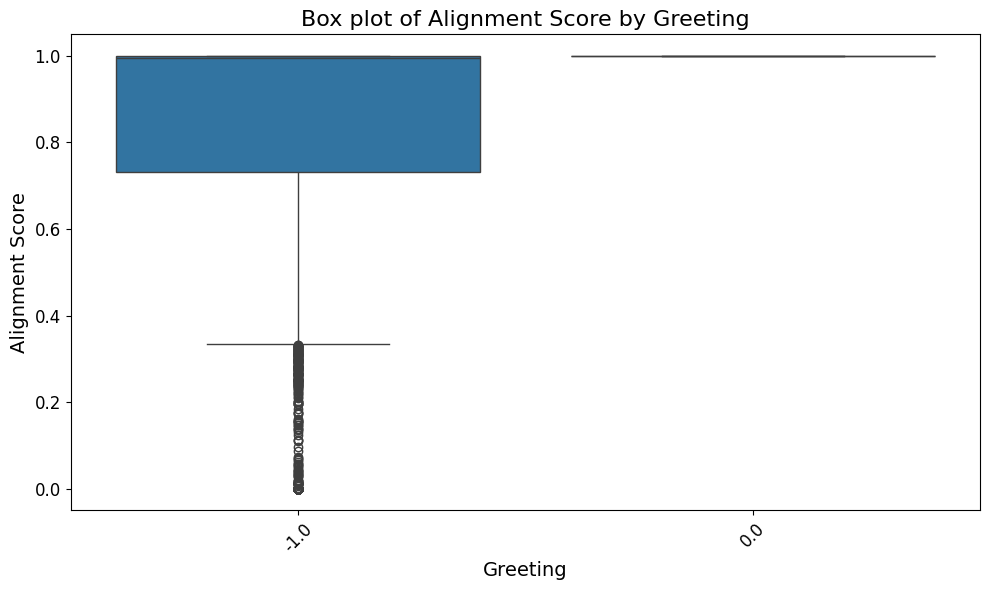

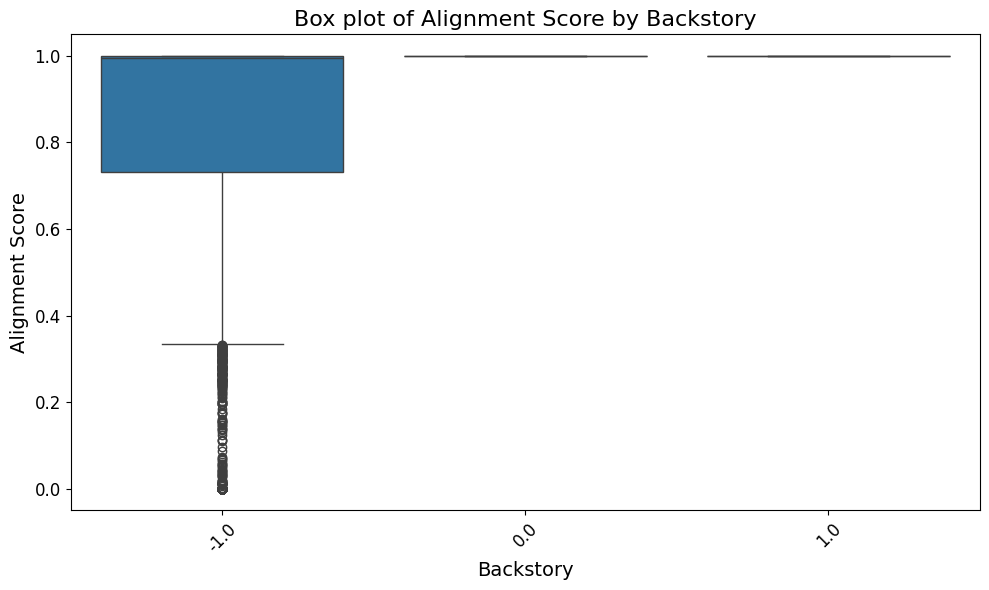

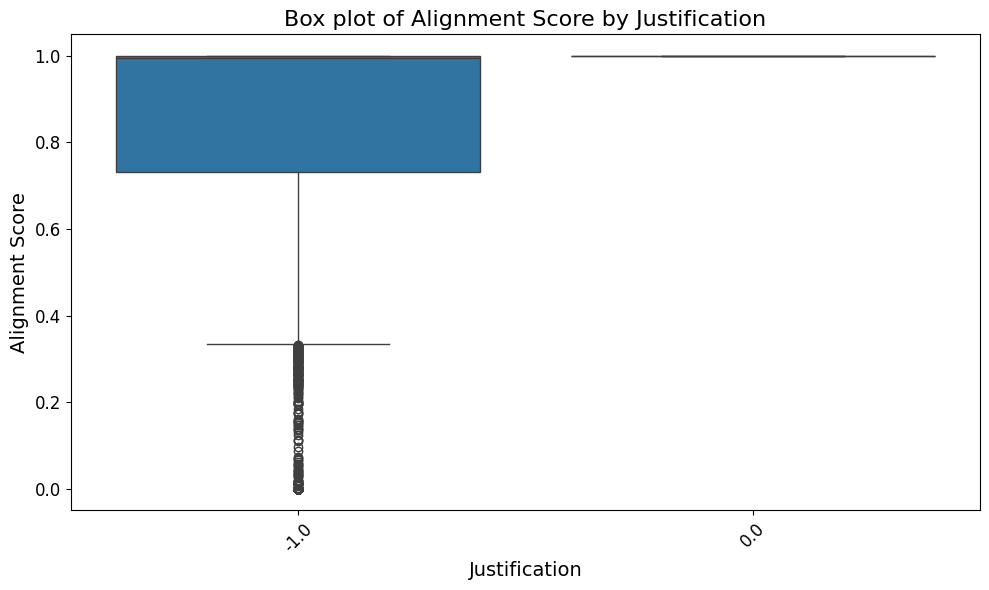

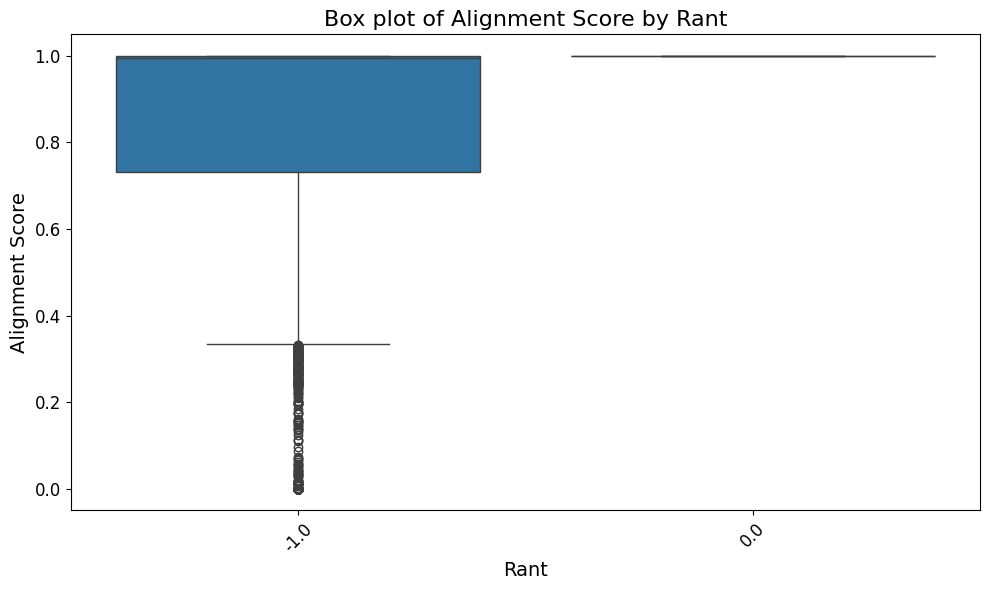

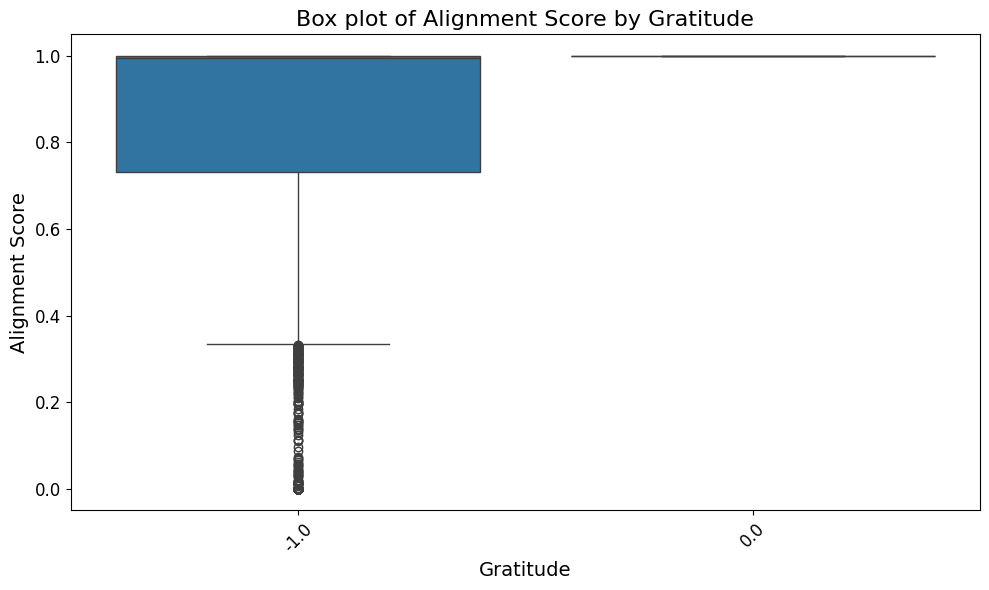

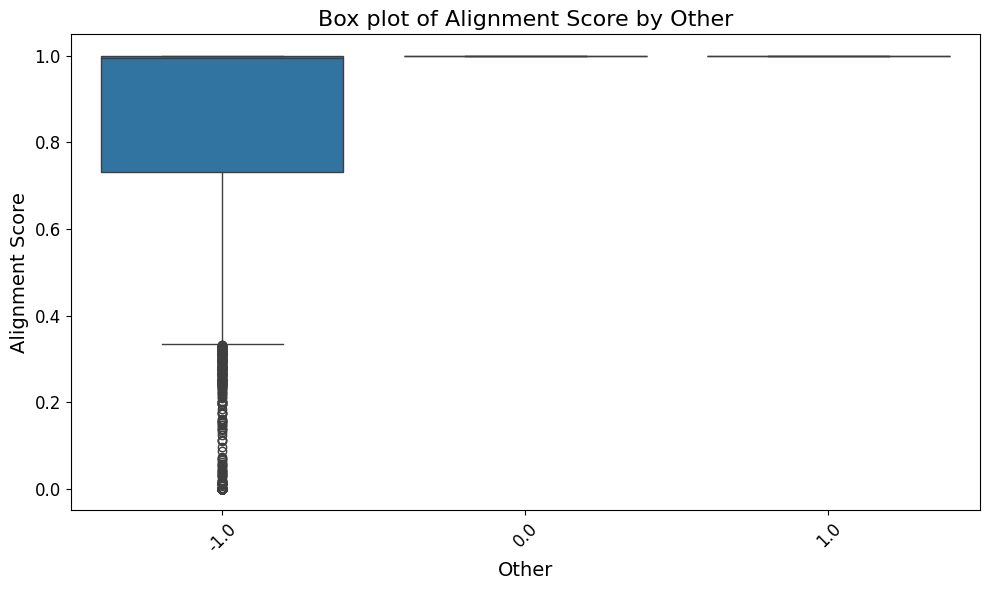

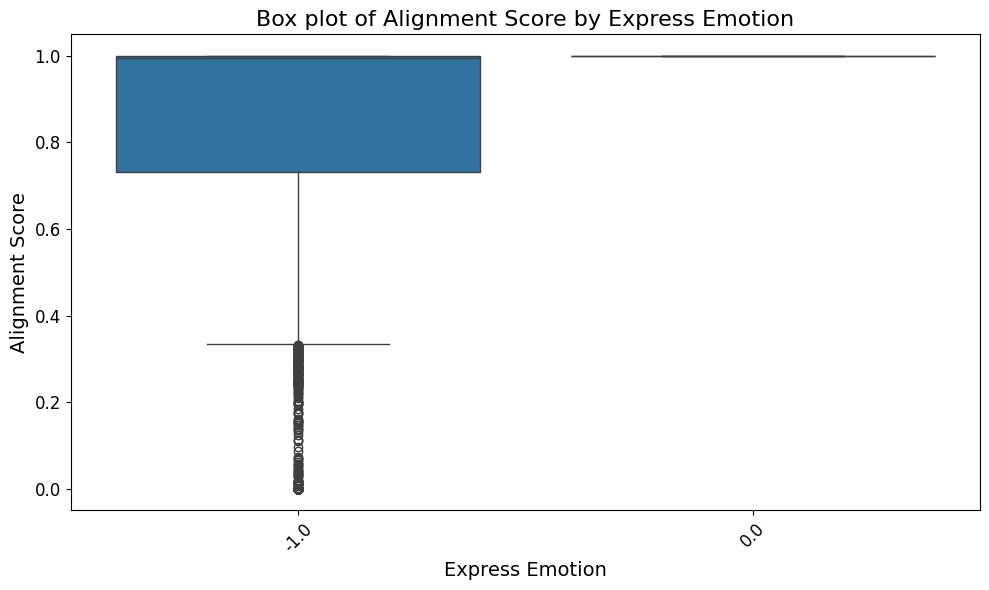

In [32]:
# Box plot for numerical columns by categorical variables
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=selected_df_copy, x=column, y='Alignment Score')
    plt.title(f'Box plot of Alignment Score by {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Alignment Score", fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


While there are differences in the counts of observations across categories within each categorical variable, the distribution of alignment scores remains relatively consistent, with similar central tendencies and variability across different groups.



### Correlation heatmap for numerical columns

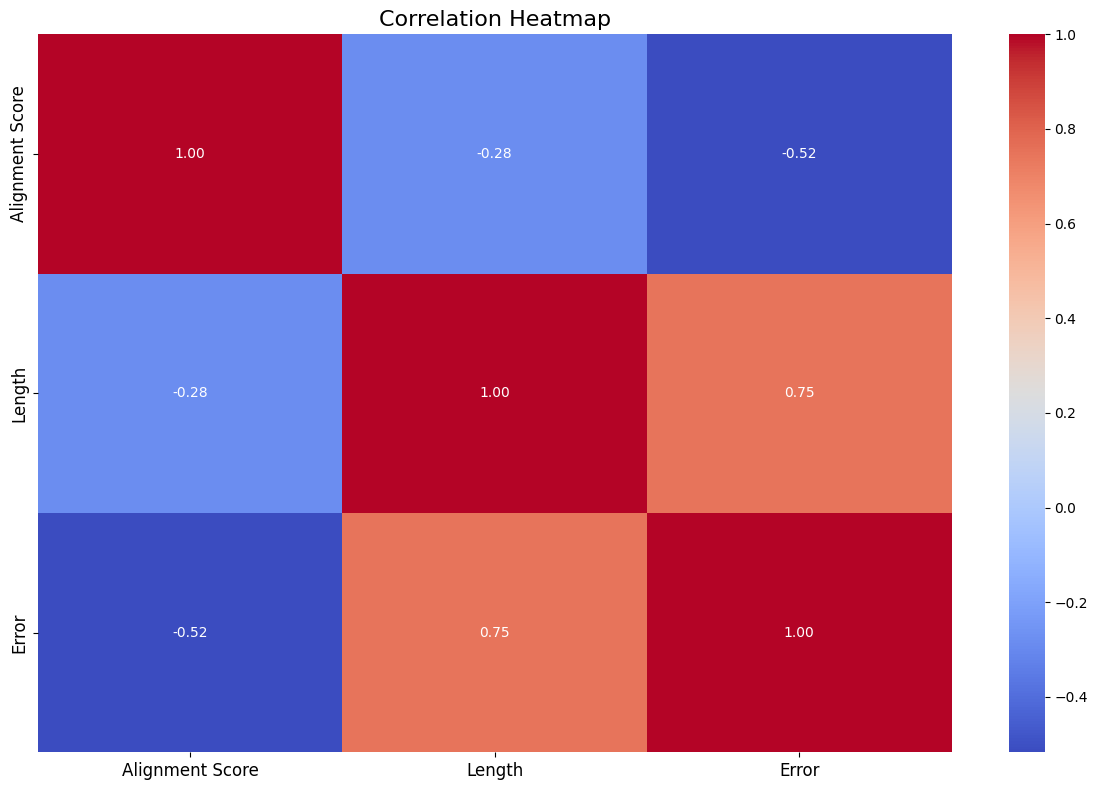

In [33]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(selected_df_copy[['Alignment Score', 'Length', 'Error']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


1. Alignment Score vs. Length: Negative correlation of -0.293, indicating a slight decrease in alignment score as text length increases.

2. Alignment Score vs. Error: Strong negative correlation of -0.856, showing that higher errors correspond to lower alignment scores.

3. Length vs. Error:
Moderate positive correlation of 0.619, suggesting longer texts tend to have higher error rates.


### Correlation Analysis

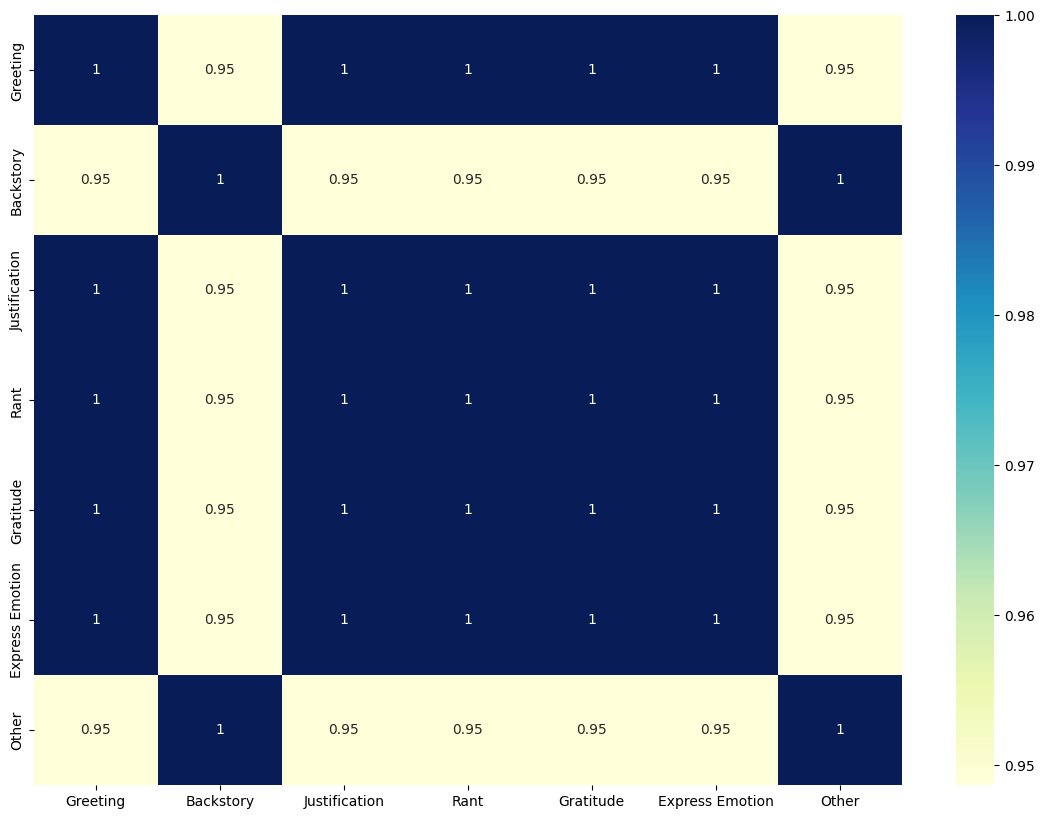

In [34]:
# Correlation Analysis between the different classes
plt.figure(figsize=(14, 10))
sns.heatmap(selected_df_copy[['Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Express Emotion', 'Other']].corr(), annot=True, cmap='YlGnBu')
plt.show()


1. The highest correlation coefficient is observed between 'Gratitude' and 'Greeting', with a value of approximately 0.24. This indicates a weak positive correlation between these two variables. It suggests that there might be some tendency for the presence of 'Greeting' to be associated with instances of 'Gratitude', but the relationship is not very strong.
2. The weakest correlation coefficients are observed for several pairs of variables, including:
'Express Emotion' and 'Justification' with a coefficient of approximately -0.003.
'Express Emotion' and 'Other' with a coefficient of approximately 0.006.
'Justification' and 'Backstory' with a coefficient of approximately -0.063.
These values indicate very weak correlations, close to zero, suggesting little to no linear relationship between these pairs of variables.

**FEATURE ENGINEERING.**

**Text Preprocessing.**

In [35]:
import re
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Text Preprocessing
# Convert text to lowercase
selected_df_copy['Text'] = selected_df_copy['Text'].str.lower()

# Remove punctuation
selected_df_copy['Text'] = selected_df_copy['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Feature scaling
# Standardize numerical columns using StandardScaler
scaler = StandardScaler()
numerical_columns = ['Alignment Score', 'Agreement', 'Length', 'Error']
selected_df_copy[numerical_columns] = scaler.fit_transform(selected_df_copy[numerical_columns])



This code performs the following preprocessing and feature engineering steps:

Converts text to lowercase to ensure uniformity.
Removes punctuation to clean the text data.

Encodes categorical variables using LabelEncoder, making them suitable for model training.

Standardizes numerical columns using StandardScaler to ensure that they have a mean of 0 and a standard deviation of 1, which can improve model convergence and performance.

Confirmation of preprocessed dataframe

       Dataset ID  Request ID  \
5740          2.0      7678.0   
26200         4.0      9547.0   
28697         4.0      5836.0   
31112         1.0      1902.0   
31116         1.0      2446.0   

                                                    Text  \
5740   i have a disability and want a round trip tick...   
26200  we are moving and i need to get the new addres...   
28697  why am i unable to connect with my user name a...   
31112  hi all i posted a couple of days ago asking fo...   
31116  i am a citizen of india currently residing in ...   

                                        MergedSelections  Alignment Score  \
5740   I have a disability and want a round trip tick...        -1.111841   
26200  we are moving and I need to get the new addres...         0.628215   
28697  why am i unable to connect with my user name a...         0.628215   
31112  [Hi all, I posted a couple of days ago asking ...         0.611441   
31116  [I am a citizen of India currently residing in..

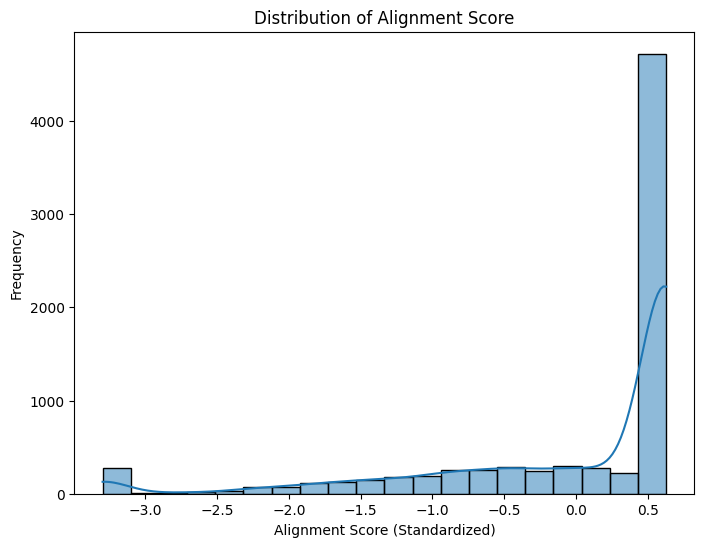

In [36]:
# Display the first few rows of the DataFrame
print(selected_df_copy.head())

# Check data types of columns
print(selected_df_copy.dtypes)

# Check unique values and counts for encoded categorical variables
for col in categorical_columns:
    print(f"Unique values for {col}:")
    print(selected_df_copy[col].value_counts())

# Check mean and standard deviation of standardized numerical columns
print(selected_df_copy[numerical_columns].describe())

# Plot histogram of 'Alignment Score' after standardization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(selected_df_copy['Alignment Score'], bins=20, kde=True)
plt.xlabel('Alignment Score (Standardized)')
plt.ylabel('Frequency')
plt.title('Distribution of Alignment Score')
plt.show()


Text Preprocessing:

The text data in the 'Text' column has been converted to lowercase, and punctuation has been removed.
Categorical Variables:

The categorical variables ('Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Other', 'Express Emotion') have been encoded using LabelEncoder.
The unique values and counts for each encoded categorical variable have been displayed, showing variations in encoded values.
Numerical Variables:

The numerical columns ('Alignment Score', 'Agreement', 'Length', 'Error') have been standardized using StandardScaler.
Summary statistics (mean, standard deviation, min, max, etc.) have been computed for the standardized numerical columns, demonstrating that they are centered around 0 with a standard deviation of 1.
Visualization:

A histogram of the 'Alignment Score' after standardization has been plotted, showing the distribution of the standardized numerical column.

# **MODELLING.**

**Setting up RASA Environment.**

In [37]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

In [38]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [39]:
#checking python version.
!python3 --version
!pip3 --version

Python 3.10.12
pip 24.0 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [40]:
# Install python3-venv package
!apt install python3.10-venv




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10-venv is already the newest version (3.10.12-1~22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [41]:
# Create a virtual environment
!python3 -m venv ./venv

# Activate the virtual environment
!source ./venv/bin/activate


Installing RASA Open source.

In [42]:
#Ensuring pip version is up to date.
!pip3 install -U pip

In [43]:
#installing RASA open source.
!pip install rasa



  Using cached scikit_learn-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.20.1 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


Spacy Language Model.

In [44]:
!pip3 install 'rasa[spacy]'
!python3 -m spacy download en_core_web_md



2024-02-13 07:01:58.518119: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-13 07:01:58.656910: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-13 07:01:58.658458: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-13 07:02:01.547476: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 20.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [45]:
print(selected_df_copy.columns)

Index(['Dataset ID', 'Request ID', 'Text', 'MergedSelections',
       'Alignment Score', 'Agreement', 'Greeting', 'Backstory',
       'Justification', 'Rant', 'Gratitude', 'Other', 'Express Emotion',
       'Length', 'Error'],
      dtype='object')


Splitting the data for modelling

In [46]:
# from sklearn.model_selection import train_test_split

# # Define features (X) and target (y)
# X = selected_df_copy[['Text', 'MergedSelections', 'Greeting', 'Backstory', 'Rant', 'Gratitude', 'Justification', 'Alignment Score', 'Agreement', 'Other', 'Length', 'Error']]
# y = selected_df_copy['Express Emotion']  # Assuming 'Express Emotion' is a single column

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Check the shape of the training and testing sets
# print("Training set shape:", X_train.shape, y_train.shape)
# print("Testing set shape:", X_test.shape, y_test.shape)




In [47]:
!pip uninstall scikit-learn -y
!pip install scikit-learn


Found existing installation: scikit-learn 1.1.3
Uninstalling scikit-learn-1.1.3:
  Successfully uninstalled scikit-learn-1.1.3
  Using cached scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rasa 3.6.16 requires scikit-learn<1.2,>=0.22; python_version >= "3.8" and python_version < "3.11", but you have scikit-learn 1.4.0 which is incompatible.


In [48]:
from sklearn.model_selection import train_test_split
#define x(features) and y (target)
x= selected_df_copy[['Text']]
y= selected_df_copy[['Greeting','Backstory','Rant','Gratitude','Justification',]]

#split the dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

#check shape of the training and testing sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)


Training set shape: (6249, 1) (6249, 5)
Testing set shape: (1563, 1) (1563, 5)


In [49]:
# Iterate through the 'Text' column and print some information
for text in selected_df_copy['Text'].sample(100):  # Sample 5 random texts
    print("Text:", text)
    print("-" * 50)


Text: i booked a passager on the autotrain for december 3 and now i saw where there is a 9500 saver fare is it possible dfor me to get this
--------------------------------------------------
Text: hi all im flying aer lingus from edinburgh to new york via dublin next monday i understand that my baggage will be checked all the way through as its all one booking however im unsure of the procedure when i get to dublin airport ive never got a connecting flight before do i have to leave the arrivals bit and go back through security or is there a route allowing me to go straight to the gate for new york any advice much appreciated thanks nick
--------------------------------------------------
Text: i do not have an infant traveling with me i want to check in but cannot proceed can you help
--------------------------------------------------
Text: how do i modify my reservation it seems like my only option is to cancel and rebook  is that the case
----------------------------------------------

**RASA NLU Training Data.**

**nlu.yml.**

In [91]:
version="3.0"

nlu_md = """
- intent: greet
  examples: |
    - Hi there!
    - Hello!
    - Good morning!
    - Hey, how can I help you?
    - Hi, what can I assist you with today?

- intent: goodbye
  examples: |
    - Goodbye!
    - Bye!
    - Have a great day!
    - See you later!
    - Bye-bye, take care!

- intent: thanks
  examples: |
    - Thank you!
    - Thanks a lot!
    - Thanks for your help!
    - I appreciate it!
    - Thanks, you've been helpful!

- intent: affirm
  examples: |
    - Yes, please!
    - Absolutely!
    - That sounds good!
    - Sure, go ahead!
    - Yes, I agree!

- intent: deny
  examples: |
    - No, thanks.
    - I'm good, thanks.
    - No, that's okay.
    - I'd rather not.
    - No, I don't think so.

- intent: apology
  examples: |
    - I'm sorry about that.
    - Sorry for the inconvenience.
    - My apologies for the confusion.
    - I apologize for the misunderstanding.
    - Sorry, that was not my intention.
- intent: flight_information
  examples: |
    - Can you provide information about [flights](travel_option) with JetBlue?
    - What are the baggage policies for [connecting flights](travel_option) with different airlines?
    - How many checked bags are allowed on [JetBlue](airline) flights?

- intent: billing_preferences
  examples: |
    - I prefer not to receive [email billing](billing_option). Can I opt out?
    - Is it possible to receive [paper bills](billing_option) instead of electronic ones?
    - How can I change my [billing preferences](billing_option) to exclude email notifications?

- intent: email_configuration
  examples: |
    - How do I [configure](email_action) Microsoft Outlook 2016 for email?
    - Can you guide me through [setting up email](email_action) on my Microsoft Outlook?
    - What are the steps to [configure email](email_action) in Microsoft Outlook?

- intent: airport_facilities
  examples: |
    - What [facilities](facility_type), for example, showers and lounges, are there at [Hong Kong Airport](airport_name)?
    - Can you provide information about the [amenities](facility_type) at Hong Kong Airport?
    - Are there [shower facilities](facility_type) at Hong Kong Airport?

- intent: fare_announcement
  examples: |
    - [British Airways](airline) has announced a limited sale. How can I book a ticket?
    - Can you provide details about the limited sale announced by [British Airways](airline)?
    - What are the terms and conditions for the limited sale announced by [British Airways](airline)?

- intent: login_issues
  examples: |
    - I'm unable to [log in](login_action) to my Roku and Smart TV with my [CNAME](company_name) credentials. Can you help?
    - How do I resolve [login issues](login_action) with my Roku and Smart TV?
    - I forgot my [CNAME credentials](login_credential) for logging in to my Roku and Smart TV.

- intent: flight_booking
  examples: |
    - I'm looking for [flight options](travel_option) from New York to Brisbane around December 7th. Any recommendations?
    - Can you suggest airlines with [affordable prices](pricing_preference) for flights from New York to Brisbane?
    - Which airlines offer the best deals for flights from New York to Brisbane in [December](month)?

- intent: urgent_assistance
  examples: |
    - I need [urgent assistance](support_type). Can I speak with a customer service representative?
    - Is there a [phone number](contact_info) I can call for immediate assistance?
    - How can I get [urgent help](support_type) with my issue?

- intent: reservation_changes
  examples: |
    - There was a [change](reservation_status) in my reservation. How can I print the latest ticket reservation?
    - Can you guide me through making [changes](reservation_status) to my flight reservation?
    - How do I update my reservation details for the latest [changes](reservation_status)?

- intent: internet_issues
  examples: |
    - My internet speed has significantly slowed down since the recent [upgrade](internet_status). What should I do?
    - How can I troubleshoot [slow internet speed](internet_status) after an upgrade?
    - Is there a way to fix [slow internet speed](internet_status) after a recent upgrade?

- intent: flight_delay
  examples: |
    - My flight from [Cardiff](departure_city) to [Male](arrival_city) was delayed by 22 hours. How can I claim compensation?
    - Can you provide information about [compensation](claim_type) for flight delays with Thomson?
    - How do I file a compensation [claim](claim_type) for a delayed flight with Thomson Airways?

"""

with open("nlu.md", "w") as file:
    file.write(nlu_md)
print("Output has been written to nlu.md file.")


Output has been written to nlu.md file.


In [92]:
# version: "3.0"

# nlu_md = """
# - intent: greet
#   examples: |
#     - Hi there!
#     - Hello!

# - intent: goodbye
#   examples: |
#     - Goodbye!
#     - Bye!

# - intent: affirm
#   examples: |
#     - Yes, please!
#     - Absolutely!

# - intent: deny
#   examples: |
#     - No, thanks.
#     - I'm good, thanks.

# - intent: apology
#   examples: |
#     - I'm sorry about that.
#     - My apologies for the confusion.
# """

# with open("nlu.md", "w") as file:
#     file.write(nlu_md)
# print("Output has been written to nlu.md file.")

In [93]:
nlu_file_path = "/content/nlu.md"

# Read the contents of the NLU training data file
with open(nlu_file_path, "r") as file:
    nlu_data = file.read()

# Print the contents of the NLU training data file
print("Contents of the NLU training data file:")
print(nlu_data)

# Count the number of intents in the training data
intents = [line.split(":")[1].strip() for line in nlu_data.split("\n") if line.startswith("## intent:")]
num_intents = len(intents)

# Print the number of intents and list of intents
print("\nNumber of intents:", num_intents)
print("List of intents:", intents)


Contents of the NLU training data file:

- intent: greet
  examples: |
    - Hi there!
    - Hello!
    - Good morning!
    - Hey, how can I help you?
    - Hi, what can I assist you with today?

- intent: goodbye
  examples: |
    - Goodbye!
    - Bye!
    - Have a great day!
    - See you later!
    - Bye-bye, take care!

- intent: thanks
  examples: |
    - Thank you!
    - Thanks a lot!
    - Thanks for your help!
    - I appreciate it!
    - Thanks, you've been helpful!

- intent: affirm
  examples: |
    - Yes, please!
    - Absolutely!
    - That sounds good!
    - Sure, go ahead!
    - Yes, I agree!

- intent: deny
  examples: |
    - No, thanks.
    - I'm good, thanks.
    - No, that's okay.
    - I'd rather not.
    - No, I don't think so.

- intent: apology
  examples: |
    - I'm sorry about that.
    - Sorry for the inconvenience.
    - My apologies for the confusion.
    - I apologize for the misunderstanding.
    - Sorry, that was not my intention.
- intent: flight_infor

**config.yml.**

In [94]:
version="3.0"
config_yml = """

language: "en"
pipeline:
  - name: "WhitespaceTokenizer"
  - name: "RegexFeaturizer"
  - name: "LexicalSyntacticFeaturizer"
  - name: "CountVectorsFeaturizer"
  - name: "CountVectorsFeaturizer"
    analyzer: "char_wb"
    min_ngram: 1
    max_ngram: 4
  - name: "DIETClassifier"
    epochs: 100
  - name: "EntitySynonymMapper"
  - name: "CRFEntityExtractor"
  - name: "ResponseSelector"
    epochs: 100

policies:
  - name: "MemoizationPolicy"
  - name: "TEDPolicy"
    max_history: 5
    epochs: 100
  - name: "RulePolicy"
"""

with open("config.yml", "w") as f:
    f.write(config_yml)
print("Output has been written to config.yml file.")


Output has been written to config.yml file.


In [95]:
config_file_path = "/content/config.yml"

# Read the contents of the config training data file
with open(config_file_path, "r") as file:
    config_data = file.read()

# Print the contents of the config training data file
print("Contents of the config training data file:")
print(config_data)

# Count the number of intents in the training data
intents = [line.split(":")[1].strip() for line in nlu_data.split("\n") if line.startswith("## intent:")]
num_intents = len(intents)

# Print the number of intents and list of intents
print("\nNumber of intents:", num_intents)
print("List of intents:", intents)

Contents of the config training data file:


language: "en"
pipeline:
  - name: "WhitespaceTokenizer"
  - name: "RegexFeaturizer"
  - name: "LexicalSyntacticFeaturizer"
  - name: "CountVectorsFeaturizer"
  - name: "CountVectorsFeaturizer"
    analyzer: "char_wb"
    min_ngram: 1
    max_ngram: 4
  - name: "DIETClassifier"
    epochs: 100
  - name: "EntitySynonymMapper"
  - name: "CRFEntityExtractor"
  - name: "ResponseSelector"
    epochs: 100

policies:
  - name: "MemoizationPolicy"
  - name: "TEDPolicy"
    max_history: 5
    epochs: 100
  - name: "RulePolicy"


Number of intents: 0
List of intents: []


**Domain.yml.**

In [96]:
# Define the content of the domain file
version: "3.0"
domain_yml= """

intents:
  - greet
  - goodbye
  - thanks
  - affirm
  - deny
  - apology
  - flight_information
  - billing_preferences
  - email_configuration
  - airport_facilities
  - fare_announcement
  - login_issues
  - flight_booking
  - urgent_assistance
  - reservation_changes
  - internet_issues
  - flight_delay
  - out_of_scope

responses:
  utter_greet:
    - text: "Hello! How can I assist you today?"

  utter_goodbye:
    - text: "Goodbye! Have a great day!"

  utter_thanks:
    - text: "You're welcome! If you need further assistance, feel free to ask."

  utter_affirm:
    - text: "Great! Let me know how I can help you further."

  utter_deny:
    - text: "No problem. If you change your mind, I'll be here to assist you."

  utter_apology:
    - text: "I apologize for the inconvenience. Let me know how I can make things right."

  utter_out_of_scope:
    - text: "I'm sorry, I'm not equipped to handle that request. Can you please ask me something else?"

  utter_response_timeout:
    - text: "It seems you've taken too long to respond. Feel free to reach out whenever you're ready."
    - text: "It seems our conversation has ended due to inactivity. Feel free to start a new conversation whenever you're ready."

actions:
  - action_provide_flight_information
  - action_configure_email
  - action_provide_airport_facilities
  - action_handle_billing_preferences
  - utter_ask_howcanhelp
"""

# Write content to domain.yml file
with open("domain.yml", "w") as file:
    file.write(domain_yml)

print("Output has been written to domain.yml file.")


Output has been written to domain.yml file.


In [97]:
# version: "3.0"
# domain_yml= """
# intents:
# - greet
# - goodbye
# - affirm
# - deny
# - apology

# responses:
#   utter_greet:
#   - text: "Hello! How can I assist you today?"

#   utter_goodbye:
#   - text: "Goodbye! Have a great day!"

#   utter_thanks:
#   - text: "You're welcome! If you need further assistance, feel free to ask."

#   utter_affirm:
#   - text: "Great! Let me know how I can help you further."

#   utter_deny:
#   - text: "No problem. If you change your mind, I'll be here to assist you."

#   utter_apology:
#   - text: "I apologize for the inconvenience. Let me know how I can make things right."

#   utter_fallback:
#   - text: "I'm sorry, I didn't quite understand that. Can you please rephrase your message?"

#   utter_out_of_scope:
#   - text: "I'm sorry, I'm not equipped to handle that request. Can you please ask me something else?"

#   utter_response_timeout:
#   - text: "It seems you've taken too long to respond. Feel free to reach out whenever you're ready."

#   utter_session_expired:
#   - text: "It seems our conversation has ended due to inactivity. Feel free to start a new conversation whenever you're ready."
# """
# # Write content to domain.yml file
# with open("domain.yml", "w") as file:
#     file.write(domain_yml)

# print("Output has been written to domain.yml file.")


In [98]:
domain_file_path = "/content/domain.yml"

# Read the contents of the domain training data file
with open(domain_file_path, "r") as file:
    domain_data = file.read()

# Print the contents of the domain training data file
print("Contents of the domain training data file:")
print(nlu_data)

# Count the number of intents in the training data
intents = [line.split(":")[1].strip() for line in nlu_data.split("\n") if line.startswith("## intent:")]
num_intents = len(intents)

# Print the number of intents and list of intents
print("\nNumber of intents:", num_intents)
print("List of intents:", intents)

Contents of the domain training data file:

- intent: greet
  examples: |
    - Hi there!
    - Hello!
    - Good morning!
    - Hey, how can I help you?
    - Hi, what can I assist you with today?

- intent: goodbye
  examples: |
    - Goodbye!
    - Bye!
    - Have a great day!
    - See you later!
    - Bye-bye, take care!

- intent: thanks
  examples: |
    - Thank you!
    - Thanks a lot!
    - Thanks for your help!
    - I appreciate it!
    - Thanks, you've been helpful!

- intent: affirm
  examples: |
    - Yes, please!
    - Absolutely!
    - That sounds good!
    - Sure, go ahead!
    - Yes, I agree!

- intent: deny
  examples: |
    - No, thanks.
    - I'm good, thanks.
    - No, that's okay.
    - I'd rather not.
    - No, I don't think so.

- intent: apology
  examples: |
    - I'm sorry about that.
    - Sorry for the inconvenience.
    - My apologies for the confusion.
    - I apologize for the misunderstanding.
    - Sorry, that was not my intention.
- intent: flight_in

The output provided is formatted in YAML, which is a human-readable data serialization format often used for configuration files. Here's the breakdown of the content:

intents: This section lists all the intents recognized by the chatbot. Intents represent the purpose or meaning behind a user's message.

Examples include: greet, goodbye, mood_affirm, mood_deny, mood_great, mood_unhappy, inform, and query.

responses: This section defines the responses that the chatbot can give based on the detected intents.

Each response is associated with an utter_ prefix followed by the intent name.

The text field under each response specifies the text message that the chatbot will send to the user.

session_config: This section contains configuration settings related to user sessions.

session_expiration_time determines how long a user session will last (in seconds).

carry_over_slots_to_new_session indicates whether slot values from the previous session should be carried over to the new session.

In summary, the output defines the intents recognized by the chatbot, the corresponding responses for each intent, and session configuration settings.






**Stories.yml**

In [99]:
version= "3.0"
stories_yml= """

stories:
- story: greet and ask how to help
  steps:
  - intent: greet
  - action: utter_greet
  - action: utter_ask_howcanhelp

- story: user wants flight information
  steps:
  - intent: flight_information
  - action: action_provide_flight_information

- story: user wants to configure email
  steps:
  - intent: email_configuration
  - action: action_configure_email

- story: user wants to know airport facilities
  steps:
  - intent: airport_facilities
  - action: action_provide_airport_facilities

- story: user thanks the bot
  steps:
  - intent: thanks
  - action: utter_thanks

- story: user denies a suggestion
  steps:
  - intent: deny
  - action: utter_deny

- story: user apologizes
  steps:
  - intent: apology
  - action: utter_apology

- story: user asks for billing preferences
  steps:
  - intent: billing_preferences
  - action: action_handle_billing_preferences
"""
# Write content to stories.yml file
with open("stories.yml", "w") as file:
    file.write(stories_yml)

print("Output has been written to stories.yml file.")

Output has been written to stories.yml file.


In [100]:
# version: "3.0"

# stories_yml = """
# stories:
# - story: Greet and Exit
#   steps:
#   - intent: greet
#   - action: utter_greet

# - story: Farewell
#   steps:
#   - intent: goodbye
#   - action: utter_goodbye

# - story: Confirm Affirmation
#   steps:
#   - intent: affirm
#   - action: utter_affirm

# - story: Confirm Denial
#   steps:
#   - intent: deny
#   - action: utter_deny

# - story: Apologize
#   steps:
#   - intent: apology
#   - action: utter_apology
# """

# with open("stories.yml", "w") as file:
#     file.write(stories_yml)
# print("Output has been written to stories.yml file.")

In [101]:
stories_file_path = "/content/stories.yml"

# Read the contents of the stories training data file
with open(stories_file_path, "r") as file:
    stories_data = file.read()

# Print the contents of the stories training data file
print("Contents of the stories training data file:")
print(nlu_data)

# Count the number of intents in the training data
intents = [line.split(":")[1].strip() for line in nlu_data.split("\n") if line.startswith("## intent:")]
num_intents = len(intents)

# Print the number of intents and list of intents
print("\nNumber of intents:", num_intents)
print("List of intents:", intents)

Contents of the stories training data file:

- intent: greet
  examples: |
    - Hi there!
    - Hello!
    - Good morning!
    - Hey, how can I help you?
    - Hi, what can I assist you with today?

- intent: goodbye
  examples: |
    - Goodbye!
    - Bye!
    - Have a great day!
    - See you later!
    - Bye-bye, take care!

- intent: thanks
  examples: |
    - Thank you!
    - Thanks a lot!
    - Thanks for your help!
    - I appreciate it!
    - Thanks, you've been helpful!

- intent: affirm
  examples: |
    - Yes, please!
    - Absolutely!
    - That sounds good!
    - Sure, go ahead!
    - Yes, I agree!

- intent: deny
  examples: |
    - No, thanks.
    - I'm good, thanks.
    - No, that's okay.
    - I'd rather not.
    - No, I don't think so.

- intent: apology
  examples: |
    - I'm sorry about that.
    - Sorry for the inconvenience.
    - My apologies for the confusion.
    - I apologize for the misunderstanding.
    - Sorry, that was not my intention.
- intent: flight_i

**rules.yml.**

In [102]:
version: "3.0"
rules_yml="""
rules:
  - rule: Handle greeting
    steps:
      - intent: greet
      - action: utter_greet

  - rule: Handle goodbye
    steps:
      - intent: goodbye
      - action: utter_goodbye

  - rule: Affirmation
    steps:
      - intent: mood_affirm
      - action: utter_mood_affirm

  - rule: Deny
    steps:
      - intent: mood_deny
      - action: utter_mood_deny

  - rule: Handle great mood
    steps:
      - intent: mood_great
      - action: utter_mood_great

  - rule: Handle unhappy mood
    steps:
      - intent: mood_unhappy
      - action: utter_mood_unhappy

  - rule: Provide information
    steps:
      - intent: inform
      - action: utter_inform

  - rule: Handle query
    steps:
      - intent: query
      - action: utter_query
"""
# Write content to rules.yml file
with open("rules.yml", "w") as file:
    file.write(rules_yml)

print("Output has been written to rules.yml file.")

Output has been written to rules.yml file.


In [103]:
# version: "3.0"

# rules_yml = """
# rules:
# - rule: Greet Rule
#   steps:
#   - intent: greet
#   - action: utter_greet

# - rule: Farewell Rule
#   steps:
#   - intent: goodbye
#   - action: utter_goodbye

# - rule: Affirmation Rule
#   steps:
#   - intent: affirm
#   - action: utter_affirm

# - rule: Denial Rule
#   steps:
#   - intent: deny
#   - action: utter_deny

# - rule: Apology Rule
#   steps:
#   - intent: apology
#   - action: utter_apology
# """

# with open("rules.yml", "w") as file:
#     file.write(rules_yml)
# print("Output has been written to rules.yml file.")

In [104]:
rules_file_path = "/content/rules.yml"

# Read the contents of the rules training data file
with open(rules_file_path, "r") as file:
    rules_data = file.read()

# Print the contents of the stories training data file
print("Contents of the rules training data file:")
print(rules_data)

# Count the number of intents in the training data
intents = [line.split(":")[1].strip() for line in nlu_data.split("\n") if line.startswith("## intent:")]
num_intents = len(intents)

# Print the number of intents and list of intents
print("\nNumber of intents:", num_intents)
print("List of intents:", intents)

Contents of the rules training data file:

rules:
  - rule: Handle greeting
    steps:
      - intent: greet
      - action: utter_greet

  - rule: Handle goodbye
    steps:
      - intent: goodbye
      - action: utter_goodbye

  - rule: Affirmation
    steps:
      - intent: mood_affirm
      - action: utter_mood_affirm

  - rule: Deny
    steps:
      - intent: mood_deny
      - action: utter_mood_deny

  - rule: Handle great mood
    steps:
      - intent: mood_great
      - action: utter_mood_great

  - rule: Handle unhappy mood
    steps:
      - intent: mood_unhappy
      - action: utter_mood_unhappy

  - rule: Provide information
    steps:
      - intent: inform
      - action: utter_inform

  - rule: Handle query
    steps:
      - intent: query
      - action: utter_query


Number of intents: 0
List of intents: []


 Rules for handling different intents in a conversational AI system.

**rules:** This is the top-level key in the YAML structure, indicating that what follows are the rules for the conversational system.

- rule: Handle greeting: This line marks the beginning of a rule named "Handle greeting". Each rule begins with the - rule: notation.

steps: This is a sub-key indicating the steps to be followed if the conditions of the rule are met.

- intent: greet: This line specifies that the user's intent should be a greeting for this rule to be triggered.

- action: utter_greet: If the user's intent is a greeting, the system should respond with the action utter_greet.

- rule: Handle goodbye: This rule handles the user intent to say goodbye.

- rule: Affirmation: This rule handles affirmations, indicating agreement or confirmation.

- rule: Deny: This rule handles denials, indicating disagreement or refusal.

- rule: Handle great mood: This rule is triggered when the user expresses a positive mood.

- rule: Handle unhappy mood: This rule is triggered when the user expresses a negative mood.

- rule: Provide information: This rule handles the intent to provide information.

- rule: Handle query: This rule is triggered when the user asks a question or makes a query.

Each rule consists of steps that define the conditions under which it is activated (specified by the user's intent) and the action the system should take in response to that intent. These rules help govern the flow of the conversational system by defining how it should respond to different user inputs.

Training_data file. (nlu.md, config_yml, domain_yml)

In [105]:
# import os
# import shutil

# # Define the paths to your files
# config_file = '/content/config.yml'
# domain_file = '/content/domain.yml'
# nlu_file = '/content/nlu.md'

# # Define the directory where you want to copy the files
# training_data_dir = '/content/training_data'

# # Create the training_data directory if it doesn't exist
# os.makedirs(training_data_dir, exist_ok=True)

# # Copy files to the training_data directory
# shutil.copy(config_file, training_data_dir)
# shutil.copy(domain_file, training_data_dir)
# shutil.copy(nlu_file, training_data_dir)

# print("Files copied to training_data directory.")


In [106]:
# # Define the path to the training_data directory
# training_data_dir = '/content/training_data'

# # List the contents of the training_data directory
# contents = os.listdir(training_data_dir)

# # Print the contents
# print("Contents of the training_data directory:")
# for item in contents:
#     print(item)


**Training the RASA model.**

In [107]:
import os

# Define the directory path
models_directory = "/content/models"

# Create the directory if it doesn't exist
if not os.path.exists(models_directory):
    os.makedirs(models_directory)
    print("The 'models' directory has been created.")

# Execute the Rasa training command and save the model in the specified directory
!rasa train --data /content/nlu.md /content/stories.yml --out {models_directory}



/usr/local/lib/python3.10/dist-packages/rasa/core/tracker_store.py:1044: MovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base: DeclarativeMeta = declarative_base()
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP

In [108]:
# def validate_training_data_files(file_paths):
#     for file_path in file_paths:
#         try:
#             with open(file_path, 'r') as file:
#                 content = file.read()
#                 if not content.strip():
#                     print(f"Warning: File {file_path} is empty or contains only whitespace.")
#                 else:
#                     print(f"File {file_path} is valid and contains data.")
#         except FileNotFoundError:
#             print(f"Error: File {file_path} not found.")
#         except Exception as e:
#             print(f"Error reading file {file_path}: {str(e)}")

# # Example usage
# training_data_files = ['/content/nlu.md', '/content/stories.yml', '/content/domain.yml']

# validate_training_data_files(training_data_files)


In [109]:
# # Define the directory path
# models_directory = "/content/models"

# # Create the directory if it doesn't exist
# if not os.path.exists(models_directory):
#     os.makedirs(models_directory)

# print("The 'models' directory has been created.")


**Testing the Model.**